In [3]:
!pip install tensorflow

In [4]:
!pip install keras-tuner

In [5]:
!pip install xgboost

In [2]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.5 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.5 MB 5.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.5 MB 5.9 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.5 MB 5.9 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.5 MB 6.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.5 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 5.9 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- --

C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1429 - val_loss: 0.0352
Epoch 2/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0423 - val_loss: 0.0247
Epoch 3/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0312 - val_loss: 0.0210
Epoch 4/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0260 - val_loss: 0.0194
Epoch 5/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0228 - val_loss: 0.0172
Epoch 6/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0200 - val_loss: 0.0155
Epoch 7/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0177 - val_loss: 0.0133
Epoch 8/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0158 - val_loss: 0.0122
Epoch 9/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0143 - val_loss: 0.0116
Epoch 10/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0133 - val_loss: 0.0114
Epoch 11/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0124 - val_loss: 0.0106
Epoch 12/40
123/123 ━━━━━━━━━━━━━━━━━━━━ 

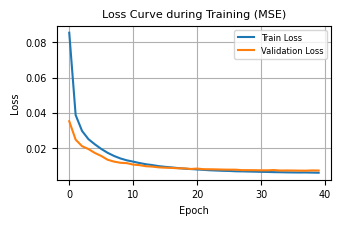

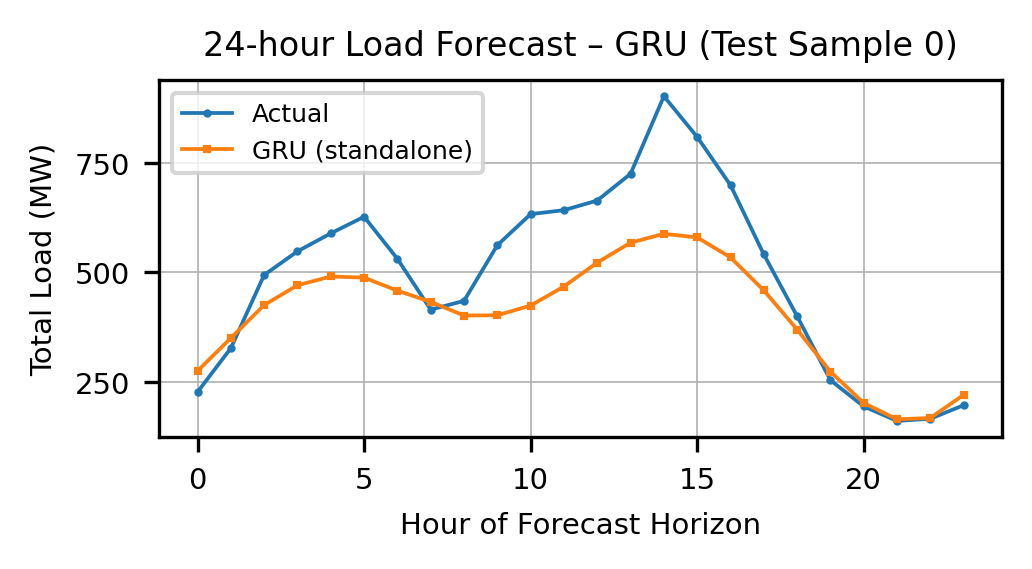

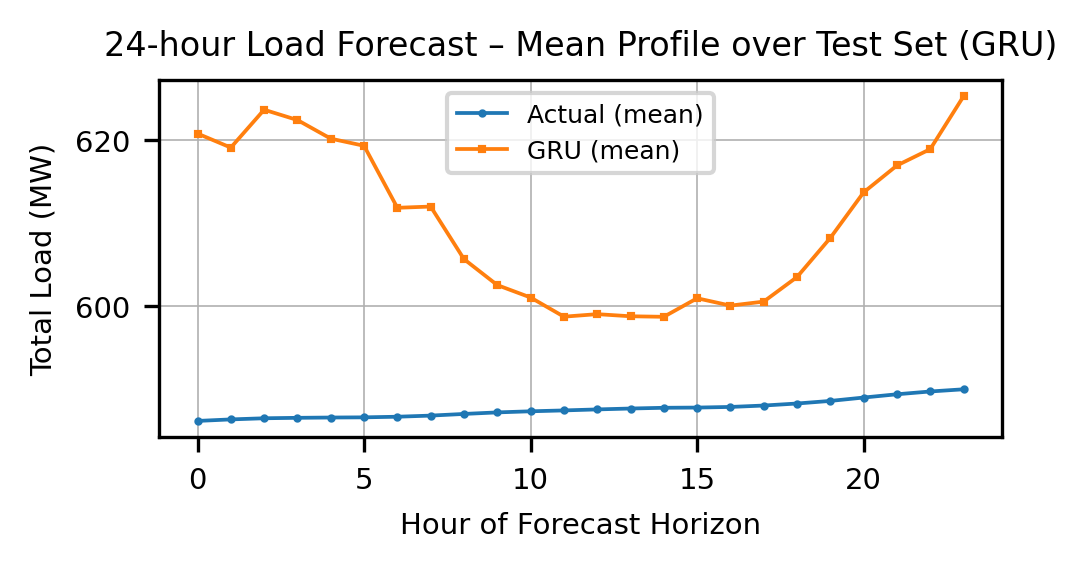


--- BASELINE METRICS ON TEST ---
[Naive D-1 (y(t-24))] MAE: 70.09 | RMSE: 96.11 | MAPE: 12.80% | R²: 0.7830 | Accuracy: 87.20%

--- Metrics on TEST ---
[GRU only] MAE: 75.87 | RMSE: 98.04 | MAPE: 15.11% | R²: 0.7742 | Accuracy: 84.89%
[**Hybrid (GRU + XGB residual)**] MAE: 53.78 | RMSE: 68.89 | MAPE: 10.61% | R²: 0.8885 | Accuracy: 89.39%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(53.77989306704578,
 68.89405335313536,
 10.606606728108579,
 0.8884701895377682,
 89.39339327189143)

In [2]:
# ======================= Setup =======================versioni i sakte
import re, sys, subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.statespace.sarimax import SARIMAX
np.random.seed(42)
tf.random.set_seed(42)

# =================== 1) Load & clean =================
df = pd.read_csv("ost_data_clean.csv", sep=';', engine='python')

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Ora'] = (
    df['Ora']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)  # vetëm një kolonë si Series
    .astype(int)
    .astype(str)
    .str.zfill(2)
)

df['Datetime'] = pd.to_datetime(df['Data'].dt.strftime('%Y-%m-%d') + ' ' + df['Ora'],
                                format='%Y-%m-%d %H', errors='coerce')
df.set_index('Datetime', inplace=True)
df.dropna(inplace=True)

# Total cross-border exchange if missing
if 'Shkembimi fizik nderkufitar' not in df.columns:
    for c in ['Shkembimi fizik nderkufitar AL-ME',
              'Shkembimi fizik nderkufitar AL-KS',
              'Shkembimi fizik nderkufitar AL-GR']:
        if c not in df.columns:
            df[c] = 0.0
    df['Shkembimi fizik nderkufitar'] = (
        df['Shkembimi fizik nderkufitar AL-ME'] +
        df['Shkembimi fizik nderkufitar AL-KS'] +
        df['Shkembimi fizik nderkufitar AL-GR']
    )

# Select base columns (rename here if your CSV uses slightly different names)
base_cols = [
    'Ngarkesa Totale',
    'Prodhimi Total',
    'Shkembimi fizik nderkufitar',
    'Shkembimi fizik nderkufitar AL-ME',
    'Shkembimi fizik nderkufitar AL-KS',
    'Shkembimi fizik nderkufitar AL-GR'
]
df = df[base_cols].copy()

# =============== 2) Time features & lags =============
df['Hour']      = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month']     = df.index.month
df['Weekend']   = (df.index.dayofweek >= 5).astype(int)

# Target lags (known at forecast time)
df['lag_1']   = df['Ngarkesa Totale'].shift(1)
df['lag_24']  = df['Ngarkesa Totale'].shift(24)
df['lag_48']  = df['Ngarkesa Totale'].shift(48)
df['lag_168'] = df['Ngarkesa Totale'].shift(168)

# Rolling stats (help for volatility/peaks)
df['roll_mean_24'] = df['Ngarkesa Totale'].rolling(24).mean()
df['roll_std_24']  = df['Ngarkesa Totale'].rolling(24).std()
df['roll_max_24']  = df['Ngarkesa Totale'].rolling(24).max()
df['roll_min_24']  = df['Ngarkesa Totale'].rolling(24).min()

# Exchange dynamics
df['Total_Exchange'] = (
    df['Shkembimi fizik nderkufitar'] +
    df['Shkembimi fizik nderkufitar AL-ME'] +
    df['Shkembimi fizik nderkufitar AL-KS'] +
    df['Shkembimi fizik nderkufitar AL-GR']
)
df['Delta_Exchange'] = df['Total_Exchange'].diff()

# Fourier seasonality
def add_fourier(df_in, tag, period, K=3):
    t = np.arange(len(df_in), dtype=float)
    for k in range(1, K+1):
        df_in[f'{tag}_sin_{period}_{k}'] = np.sin(2*np.pi*k*t/period)
        df_in[f'{tag}_cos_{period}_{k}'] = np.cos(2*np.pi*k*t/period)
    return df_in

df = add_fourier(df, 'fourier_daily', 24,  K=3)
df = add_fourier(df, 'fourier_weekly', 168, K=3)

df.dropna(inplace=True)

# Target/feature names
target_col = 'Ngarkesa Totale'
all_feat_cols = [c for c in df.columns if c != target_col]

# ============ 3) Make 24→24 sequences ================
n_input  = 24
n_output = 24
t_idx = df.columns.get_loc(target_col)

def make_sequences(df_frame, n_in=24, n_out=24):
    """Return X (N, n_in, F), y (N, n_out), hours (N, n_out), times (N, n_out)"""
    X, y, hours, times = [], [], [], []
    idx = df_frame.index
    for i in range(n_in, len(df_frame) - n_out + 1):
        X.append(df_frame.iloc[i-n_in:i].values)
        y.append(df_frame.iloc[i:i+n_out, t_idx].values)
        hours.append(idx[i:i+n_out].hour.values)
        times.append(idx[i:i+n_out].values)  # timestamps for each horizon
    return np.array(X), np.array(y), np.array(hours), np.array(times)
# ================== Rolling-origin fold generator ==================

def generate_rolling_folds(df_frame, min_train_days=90, test_days=7):
    """
    Kthen listë folds:
    [(train_start, train_end, test_start, test_end), ...]
    ku index-et janë pozicionet në df_frame (iloc).
    """
    hours_per_day = 24
    min_train_len = min_train_days * hours_per_day
    test_len      = test_days * hours_per_day

    n = len(df_frame)
    folds = []

    train_start = 0
    train_end   = min_train_len

    while True:
        test_start = train_end
        test_end   = train_end + test_len

        if test_end > n:
            break

        folds.append((train_start, train_end, test_start, test_end))

        # rolling-origin expanding window: trajnimi zgjerohet deri në fund të testit
        train_end = test_end

    return folds

# Time split (70/10/20)
n_total    = len(df)
i_train_end = int(n_total * 0.70)
i_val_end   = int(n_total * 0.80)

df_train = df.iloc[:i_train_end].copy()
df_val   = df.iloc[i_train_end:i_val_end].copy()
df_test  = df.iloc[i_val_end:].copy()

# ============== 4) Scale only on TRAIN ================
scaler = MinMaxScaler()
scaler.fit(df_train)

df_train_s = pd.DataFrame(scaler.transform(df_train), columns=df.columns, index=df_train.index)
df_val_s   = pd.DataFrame(scaler.transform(df_val),   columns=df.columns, index=df_val.index)
df_test_s  = pd.DataFrame(scaler.transform(df_test),  columns=df.columns, index=df_test.index)

X_train, y_train, hours_train, times_train = make_sequences(df_train_s, n_input, n_output)
X_val,   y_val,   hours_val,   times_val   = make_sequences(df_val_s,   n_input, n_output)
X_test,  y_test,  hours_test,  times_test  = make_sequences(df_test_s,  n_input, n_output)

input_shape = (X_train.shape[1], X_train.shape[2])

# Helper to inverse ONLY target
t_min = scaler.data_min_[t_idx]
t_max = scaler.data_max_[t_idx]
def inv_target(y_scaled):
    return y_scaled * (t_max - t_min) + t_min

# ================= 5) Baseline GRU ====================
def build_gru():
    model = Sequential([
        GRU(128, return_sequences=False,
            kernel_regularizer=l2(1e-4), recurrent_regularizer=l2(1e-4), bias_regularizer=l2(1e-4),
            input_shape=input_shape),
        Dropout(0.3),
        Dense(24, kernel_regularizer=l2(1e-4))
    ])
    model.compile(optimizer=Adam(learning_rate=5e-4), loss='mse')
    return model

gru = build_gru()
early = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# <<<— SAVE HISTORY SO WE CAN PLOT TRAIN vs VAL LOSS —>>>
history = gru.fit(
    X_train, y_train,
    epochs=40, batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early],
    verbose=1
)

plt.figure(figsize=(3.54,2))
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve during Training (MSE)', fontsize=8)
plt.xlabel('Epoch', fontsize=7); plt.ylabel('Loss', fontsize=7)
plt.grid(True); plt.legend(fontsize=6)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig("loss_curve_GRU.png", dpi=300, bbox_inches='tight')
plt.show()

# Predictions (scaled)
y_pred_tr_s = gru.predict(X_train, verbose=0)
y_pred_va_s = gru.predict(X_val,   verbose=0)
y_pred_te_s = gru.predict(X_test,  verbose=0)

# Back to MW
y_tr_true = inv_target(y_train); y_tr_pred = inv_target(y_pred_tr_s)
y_va_true = inv_target(y_val);   y_va_pred = inv_target(y_pred_va_s)
y_te_true = inv_target(y_test);  y_te_pred = inv_target(y_pred_te_s)

# ================= GRU standalone: 24h forecast vs Actual =================
sample_idx = 0
hours = np.arange(24)

plt.figure(figsize=(3.54, 2), dpi=300)
plt.plot(hours, y_te_true[sample_idx], marker='o', markersize=1, linewidth=0.9, label='Actual')
plt.plot(hours, y_te_pred[sample_idx], marker='s', markersize=1, linewidth=0.9, label='GRU (standalone)')

plt.title(f'24-hour Load Forecast – GRU (Test Sample {sample_idx})', fontsize=8)
plt.xlabel('Hour of Forecast Horizon', fontsize=7)
plt.ylabel('Total Load (MW)', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, linewidth=0.4)
plt.legend(fontsize=6)
plt.tight_layout()
plt.savefig(f"forecast_GRU_standalone_sample{sample_idx}.png", dpi=300, bbox_inches='tight')
plt.show()

# ================= 12B) Mean 24h profile over test set: Actual vs GRU =================
mean_true = y_te_true.mean(axis=0)
mean_gru  = y_te_pred.mean(axis=0)

plt.figure(figsize=(3.54, 2), dpi=300)
plt.plot(hours, mean_true, marker='o', markersize=1, linewidth=0.9, label='Actual (mean)')
plt.plot(hours, mean_gru,  marker='s', markersize=1, linewidth=0.9, label='GRU (mean)')

plt.title('24-hour Load Forecast – Mean Profile over Test Set (GRU)', fontsize=8)
plt.xlabel('Hour of Forecast Horizon', fontsize=7)
plt.ylabel('Total Load (MW)', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, linewidth=0.4)
plt.legend(fontsize=6)
plt.tight_layout()
plt.savefig("forecast_GRU_standalone_meanprofile.png", dpi=300, bbox_inches='tight')
plt.show()



# ================= 6) Build residual datasets for XGB =================
# Residuals to learn: r = y_true - y_gru
res_tr = y_tr_true - y_tr_pred
res_va = y_va_true - y_va_pred

# Build tabular features for each horizon using ORIGINAL (unscaled) engineered frame.
# We will pick features at the TARGET TIMESTAMP of each horizon.
engineered_df = df  # unscaled features & target

# Columns for XGB (exclude target itself)
xgb_feat_cols = [c for c in engineered_df.columns if c != target_col]

def rows_to_features(times_2d):
    """For each sample & horizon time, fetch feature row from engineered_df."""
    N, H = times_2d.shape
    Feat = []
    for i in range(N):
        rows = engineered_df.loc[times_2d[i]].reindex(columns=xgb_feat_cols).values  # (H, F)
        Feat.append(rows)
    return np.array(Feat)  # (N, H, F)

X_tab_tr = rows_to_features(times_train)   # (Ntr,24,F)
X_tab_va = rows_to_features(times_val)     # (Nva,24,F)
X_tab_te = rows_to_features(times_test)    # (Nte,24,F)

# Flatten per horizon for training 24 separate models
Ntr, H, F = X_tab_tr.shape
Nva = X_tab_va.shape[0]
Nte = X_tab_te.shape[0]

# ================= 7) Emphasize peaks via sample weights =================
# Define peaks by top 10% of true load in (train+val)
all_true_trva = np.concatenate([y_tr_true.reshape(-1), y_va_true.reshape(-1)])
p90_load = np.percentile(all_true_trva, 90)

# Define large-error threshold by top 10% absolute residual on (train+val)
all_res_trva = np.concatenate([np.abs(res_tr.reshape(-1)), np.abs(res_va.reshape(-1))])
p90_res = np.percentile(all_res_trva, 90)

# Weighting scheme
def make_weights(y_true_2d, res_2d):
    Y = y_true_2d.reshape(-1)
    R = np.abs(res_2d.reshape(-1))
    w = np.ones_like(Y, dtype=float)
    w[Y >= p90_load] += 1.0          # more weight to peak loads
    w[R >= p90_res]  += 1.0          # more weight to large residuals
    return w

w_tr = make_weights(y_tr_true, res_tr)   # (Ntr*24,)
w_va = make_weights(y_va_true, res_va)   # not used directly, but could for CV

# ================= 8) Train 24 XGB models (one per horizon) ==============
xgb_models = []
for h in range(H):
    # Stack train rows for horizon h
    Xh_tr = X_tab_tr[:, h, :]            # (Ntr, F)
    yh_tr = res_tr[:, h]                 # (Ntr,)
    wh_tr = w_tr[h::H]                  # pick weights aligned to horizon positions

    model_h = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        min_child_weight=1,
        n_jobs=-1,
        random_state=42
    )
    model_h.fit(Xh_tr, yh_tr, sample_weight=wh_tr, verbose=False)
    xgb_models.append(model_h)

# ================= 9) Hybrid prediction on TEST ==========================
res_hat_te = np.zeros_like(y_te_pred)  # (Nte,24)
for h in range(H):
    Xh_te = X_tab_te[:, h, :]          # (Nte,F)
    res_hat_te[:, h] = xgb_models[h].predict(Xh_te)

y_te_hybrid = y_te_pred + res_hat_te   # corrected forecast in MW

#============================shtesa e baseline========================

# ============== BASELINES: Naive D-1 dhe W-1 ===================

target_col = 'Ngarkesa Totale'

def make_naive_baseline(times_2d, df_full, lag_hours):
    """
    Kthen një matricë (N, 24) me parashikime naive:
    y_hat(t) = y(t - lag_hours)
    ku t janë timestamp-et në times_2d (times_test).
    """
    N, H = times_2d.shape
    y_hat = np.zeros((N, H), dtype=float)
    
    for i in range(N):
        for h in range(H):
            t = times_2d[i, h]
            t_lag = t - pd.Timedelta(hours=lag_hours)
            try:
                y_hat[i, h] = df_full.loc[t_lag, target_col]
            except KeyError:
                prev_times = df_full.index[df_full.index <= t_lag]
                if len(prev_times) > 0:
                    y_hat[i, h] = df_full.loc[prev_times[-1], target_col]
                else:
                    y_hat[i, h] = df_full[target_col].mean()
    return y_hat

# Naive D-1: përdor lag 24 orë
y_te_naive_D1 = make_naive_baseline(times_test, df, lag_hours=24)

# (Opsionale) Naive W-1: përdor lag 168 orë
#y_te_naive_W1 = make_naive_baseline(times_test, df, lag_hours=168)



# ================= 10) Metrics & comparison =============================
def eval_metrics(y_true_2d, y_pred_2d, tag):
    yt = y_true_2d.reshape(-1); yp = y_pred_2d.reshape(-1)
    mae  = mean_absolute_error(yt, yp)
    rmse = mean_squared_error(yt, yp, squared=False)
    eps  = 1e-6
    yt_safe = np.where(yt == 0, eps, yt)
    mape = mean_absolute_percentage_error(yt_safe, yp) * 100
    r2   = r2_score(yt, yp)
    acc  = 100 - mape
    print(f"[{tag}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}% | R²: {r2:.4f} | Accuracy: {acc:.2f}%")
    return mae, rmse, mape, r2, acc

print("\n--- BASELINE METRICS ON TEST ---")
eval_metrics(y_te_true, y_te_naive_D1, "Naive D-1 (y(t-24))")
#eval_metrics(y_te_true, y_te_naive_W1, "Naive W-1 (y(t-168))")


print("\n--- Metrics on TEST ---")
eval_metrics(y_te_true, y_te_pred,   "GRU only")
eval_metrics(y_te_true, y_te_hybrid, "**Hybrid (GRU + XGB residual)**")






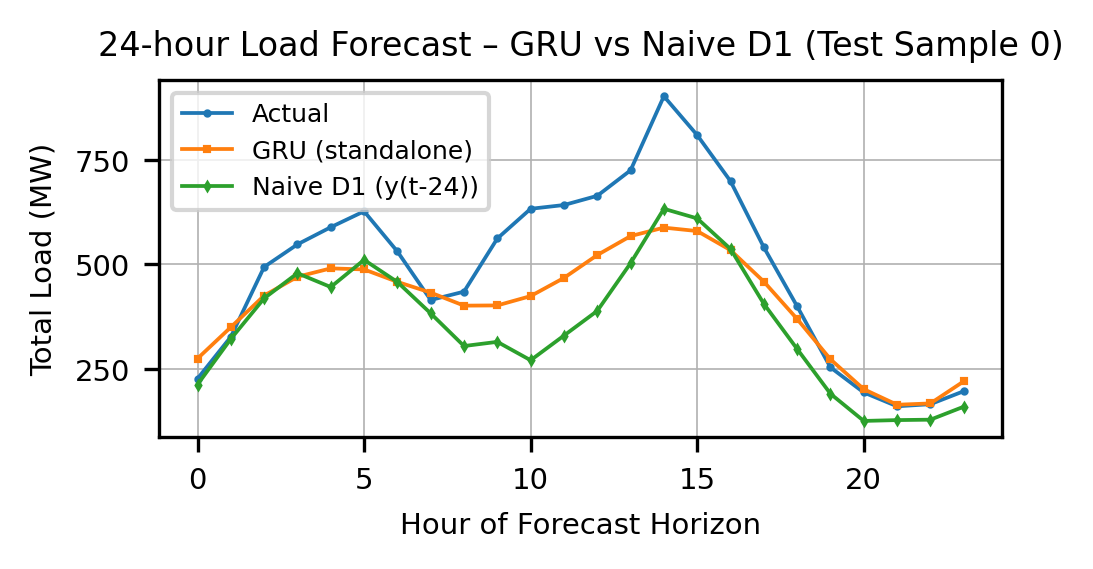

In [7]:
# ================= 12) GRU standalone vs Naive D1 vs Actual (same style) =================
sample_idx = 0
hours = np.arange(24)

plt.figure(figsize=(3.54, 2), dpi=300)
plt.plot(hours, y_te_true[sample_idx],     marker='o', markersize=1, linewidth=0.9, label='Actual')
plt.plot(hours, y_te_pred[sample_idx],     marker='s', markersize=1, linewidth=0.9, label='GRU (standalone)')
plt.plot(hours, y_te_naive_D1[sample_idx], marker='d', markersize=1, linewidth=0.9, label='Naive D1 (y(t-24))')

plt.title(f'24-hour Load Forecast – GRU vs Naive D1 (Test Sample {sample_idx})', fontsize=8)
plt.xlabel('Hour of Forecast Horizon', fontsize=7)
plt.ylabel('Total Load (MW)', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True, linewidth=0.4)
plt.legend(fontsize=6)
plt.tight_layout()
plt.savefig(f"forecast_GRU_vs_NaiveD1_sample{sample_idx}.png", dpi=300, bbox_inches='tight')
plt.show()


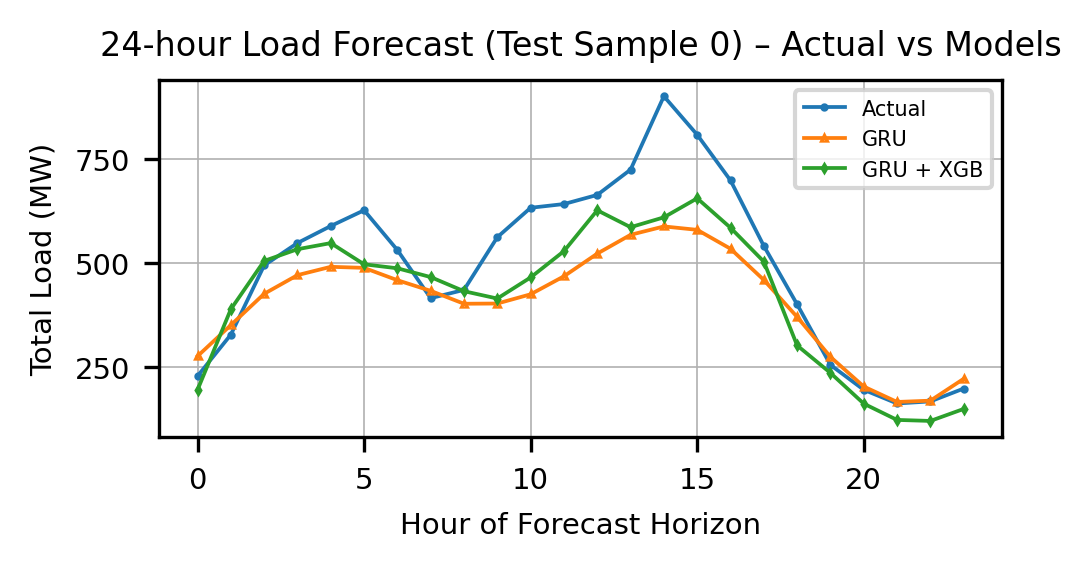

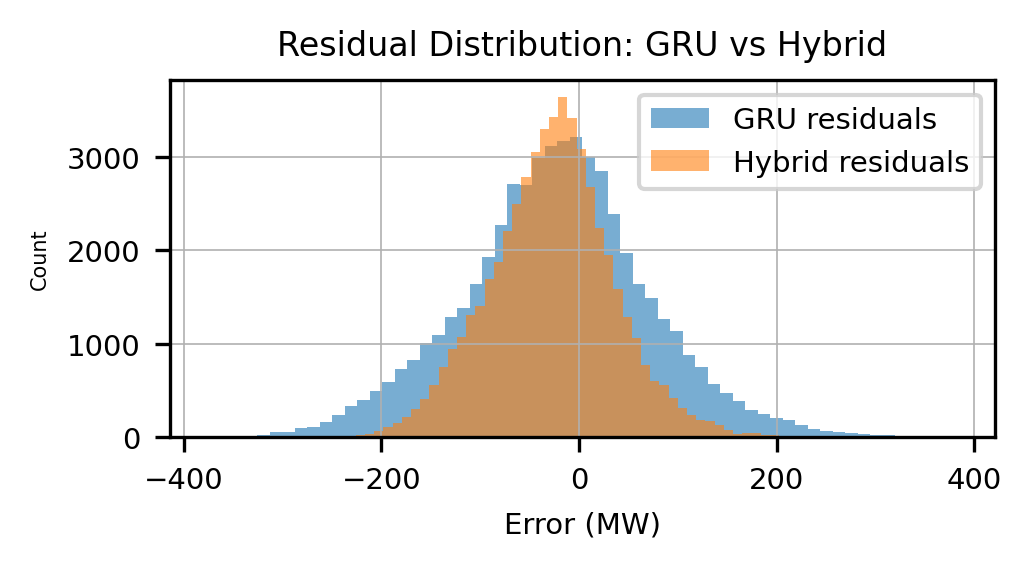

In [8]:
# ================== 1) 24-orë Forecast – krahasim vizual (styled) ==================

sample_idx = 0
hours = np.arange(24)

plt.figure(figsize=(3.54, 2), dpi=300)

plt.plot(hours, y_te_true[sample_idx],   marker='o', markersize=1, linewidth=0.9, label='Actual')
# plt.plot(hours, y_te_naive_D1[sample_idx], marker='x', markersize=1, linewidth=0.9, label='Naive D-1 (y(t-24))')
#plt.plot(hours, y_te_xgb[sample_idx],      marker='s', markersize=1, linewidth=0.9, label='XGB standalone')
plt.plot(hours, y_te_pred[sample_idx],   marker='^', markersize=1, linewidth=0.9, label='GRU')
plt.plot(hours, y_te_hybrid[sample_idx], marker='d', markersize=1, linewidth=0.9, label='GRU + XGB')

plt.title(f'24-hour Load Forecast (Test Sample {sample_idx}) – Actual vs Models', fontsize=8)
plt.xlabel('Hour of Forecast Horizon', fontsize=7)
plt.ylabel('Total Load (MW)', fontsize=7)

# numrat në boshtet
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.grid(True, linewidth=0.4)

# 🔽 Legjenda sipër djathtas + font më i vogël
plt.legend(loc='upper right', fontsize=5, frameon=True)

plt.tight_layout()
plt.savefig(f"xgb_forecast_comparison_sample{sample_idx}.png",
            dpi=300, bbox_inches='tight')
plt.show()

# ================== Residual histogram: GRU vs Hybrid (same plot) ==================

res_gru    = (y_te_true - y_te_pred).reshape(-1)
res_hybrid = (y_te_true - y_te_hybrid).reshape(-1)

plt.figure(figsize=(3.54, 2), dpi=300)

plt.hist(res_gru,    bins=60, alpha=0.6, label='GRU residuals')
plt.hist(res_hybrid, bins=60, alpha=0.6, label='Hybrid residuals')

plt.title('Residual Distribution: GRU vs Hybrid', fontsize=8)
plt.xlabel('Error (MW)', fontsize=7)
plt.ylabel('Count', fontsize=5)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.grid(True, linewidth=0.4)
plt.legend(fontsize=7)

plt.tight_layout()
plt.savefig("residuals_distribution_gru_vs_hybrid.png",
            dpi=300, bbox_inches='tight')
plt.show()





--- Metrics on TEST (XGB standalone për blending) ---
[XGB standalone (blend base)] MAE: 43.79 | RMSE: 57.58 | MAPE: 9.07% | R²: 0.9221 | Accuracy: 90.93%

Best alpha (nga validation): 1.00 me RMSE = 52.23

--- Metrics on TEST (GRU, XGB, BLEND) ---
[GRU only] MAE: 75.87 | RMSE: 98.04 | MAPE: 15.11% | R²: 0.7742 | Accuracy: 84.89%
[XGB standalone (blend base)] MAE: 43.79 | RMSE: 57.58 | MAPE: 9.07% | R²: 0.9221 | Accuracy: 90.93%
[Blended GRU + XGB (alpha=1.00)] MAE: 43.79 | RMSE: 57.58 | MAPE: 9.07% | R²: 0.9221 | Accuracy: 90.93%


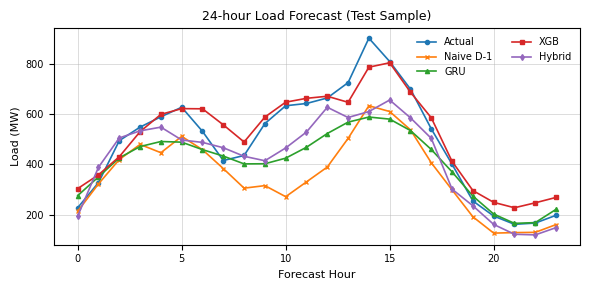

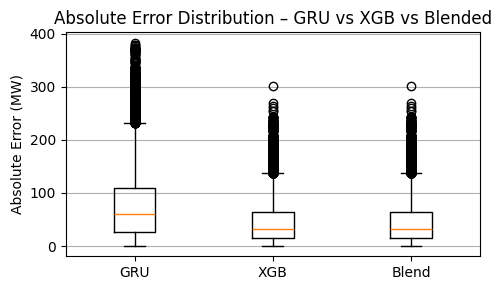

In [10]:
# ====================== BLENDING XGB + GRU ======================

from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, r2_score
)

# --- ribëjme eval_metrics pa 'squared=False' (përshtatur për Colab) ---
def eval_metrics(y_true_2d, y_pred_2d, tag):
    yt = y_true_2d.reshape(-1)
    yp = y_pred_2d.reshape(-1)

    mae = mean_absolute_error(yt, yp)

    # RMSE = sqrt(MSE), pa përdorur squared=False
    mse  = mean_squared_error(yt, yp)
    rmse = np.sqrt(mse)

    eps = 1e-6
    yt_safe = np.where(yt == 0, eps, yt)
    mape = mean_absolute_percentage_error(yt_safe, yp) * 100
    r2   = r2_score(yt, yp)
    acc  = 100 - mape

    print(f"[{tag}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}% | R²: {r2:.4f} | Accuracy: {acc:.2f}%")
    return mae, rmse, mape, r2, acc


# ----------------- 1) XGB standalone për BLENDING -----------------

xgb_blend_models = []

for h in range(H):   # H = 24 horizonte
    Xh_tr = X_tab_tr[:, h, :]      # (Ntr, F)
    yh_tr = y_tr_true[:, h]        # (Ntr,)

    model_h = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        min_child_weight=1,
        n_jobs=-1,
        random_state=42
    )
    model_h.fit(Xh_tr, yh_tr)
    xgb_blend_models.append(model_h)

# Parashikime XGB në VAL dhe TEST
y_va_xgb = np.zeros_like(y_va_true)   # (Nval, 24)
y_te_xgb = np.zeros_like(y_te_true)   # (Ntest, 24)

for h in range(H):
    Xh_va = X_tab_va[:, h, :]
    Xh_te = X_tab_te[:, h, :]

    y_va_xgb[:, h] = xgb_blend_models[h].predict(Xh_va)
    y_te_xgb[:, h] = xgb_blend_models[h].predict(Xh_te)

print("\n--- Metrics on TEST (XGB standalone për blending) ---")
eval_metrics(y_te_true, y_te_xgb, "XGB standalone (blend base)")


# ----------------- 2) Zgjedhja e α në VALIDATION -----------------

alphas = np.linspace(0, 1, 21)  # 0.00, 0.05, ..., 1.00
best_alpha = None
best_rmse = 1e9

yt_val_flat = y_va_true.reshape(-1)

for a in alphas:
    y_va_blend = a * y_va_xgb + (1 - a) * y_va_pred   # kombinim XGB + GRU në VAL
    yv_flat = y_va_blend.reshape(-1)
    mse  = mean_squared_error(yt_val_flat, yv_flat)
    rmse = np.sqrt(mse)
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = a

print(f"\nBest alpha (nga validation): {best_alpha:.2f} me RMSE = {best_rmse:.2f}")


# ----------------- 3) Blending në TEST -----------------

y_te_blend = best_alpha * y_te_xgb + (1 - best_alpha) * y_te_pred

print("\n--- Metrics on TEST (GRU, XGB, BLEND) ---")
eval_metrics(y_te_true, y_te_pred,  "GRU only")
eval_metrics(y_te_true, y_te_xgb,   "XGB standalone (blend base)")
eval_metrics(y_te_true, y_te_blend, f"Blended GRU + XGB (alpha={best_alpha:.2f})")


# ----------------- 4) Grafik 24-orësh – Actual vs të gjitha modelet -----------------
sample_idx = 0
hours = np.arange(24)

plt.figure(figsize=(6, 3))

plt.plot(hours, y_te_true[sample_idx],
         marker='o', markersize=3, linewidth=1.2, label='Actual')

plt.plot(hours, y_te_naive_D1[sample_idx],
         marker='x', markersize=3, linewidth=1.2, label='Naive D-1')

plt.plot(hours, y_te_pred[sample_idx],
         marker='^', markersize=3, linewidth=1.2, label='GRU')

plt.plot(hours, y_te_xgb[sample_idx],
         marker='s', markersize=3, linewidth=1.2, label='XGB')

plt.plot(hours, y_te_hybrid[sample_idx],
         marker='d', markersize=3, linewidth=1.2, label='Hybrid')

plt.title('24-hour Load Forecast (Test Sample)',
          fontsize=9)

plt.xlabel('Forecast Hour', fontsize=8)
plt.ylabel('Load (MW)', fontsize=8)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.grid(True, linewidth=0.5, alpha=0.6)

plt.legend(
    fontsize=7,
    loc='upper right',
    frameon=False,
    ncol=2   # e bën më kompakte
)

plt.tight_layout()
plt.savefig(
    f"forecast_comparison_sample{sample_idx}.png",
    dpi=600,  # journal-ready
    bbox_inches='tight'
)
plt.show()

# ----------------- 5) Boxplot i gabimit absolut (GRU vs XGB vs Blend) -----------------

abs_err_gru   = np.abs(y_te_true - y_te_pred).reshape(-1)
abs_err_xgb   = np.abs(y_te_true - y_te_xgb).reshape(-1)
abs_err_blend = np.abs(y_te_true - y_te_blend).reshape(-1)

plt.figure(figsize=(5, 3))
plt.boxplot(
    [abs_err_gru, abs_err_xgb, abs_err_blend],
    labels=['GRU', 'XGB', 'Blend']
)
plt.ylabel('Absolute Error (MW)')
plt.title('Absolute Error Distribution – GRU vs XGB vs Blended')
plt.grid(True, axis='y')
plt.tight_layout()
#plt.savefig("blend_absolute_error_boxplot.png", dpi=600, bbox_inches='tight')
plt.show()


In [12]:
import numpy as np
from math import erf, sqrt

def normal_cdf(x):
    return 0.5 * (1 + erf(x / np.sqrt(2)))

def diebold_mariano(y_true, y_pred1, y_pred2, h=1, power=2,
                    name1="Model 1", name2="Model 2"):
    """
    Diebold–Mariano test për krahasim të dy modeleve parashikuese.
    - y_true  : vlerat reale (N, H) ose (N,)
    - y_pred1 : parashikimet e modelit 1 (N, H) ose (N,)
    - y_pred2 : parashikimet e modelit 2 (N, H) ose (N,)
    - h       : horizonti (p.sh. 24 për 24-ore ahead)
    - power   : 2 për MSE/RMSE, 1 për MAE
    """

    # 1) Sheshojmë në vektorë 1D
    e1 = (y_true - y_pred1).reshape(-1)
    e2 = (y_true - y_pred2).reshape(-1)

    if power == 1:
        l1 = np.abs(e1)
        l2 = np.abs(e2)
    else:
        l1 = e1**2
        l2 = e2**2

    d = l1 - l2
    T = d.shape[0]
    d_mean = d.mean()

    # 2) Newey–West variance (me lag = h-1 për multi-step)
    lag = max(h - 1, 0)
    d_centered = d - d_mean
    gamma0 = np.mean(d_centered**2)
    var_d = gamma0

    for k in range(1, lag + 1):
        cov = np.mean(d_centered[k:] * d_centered[:-k])
        var_d += 2 * cov

    var_d_bar = var_d / T
    dm_stat = d_mean / np.sqrt(var_d_bar)

    # 3) p-value nga afërsia normale
    p_value = 2 * (1 - normal_cdf(abs(dm_stat)))

    print(f"\nDiebold–Mariano: {name1} vs {name2} (h={h}, power={power})")
    print(f"  d̄ (mean loss diff) = {d_mean:.4f}")
    print(f"  DM statistic        = {dm_stat:.4f}")
    print(f"  p-value (2-sided)   = {p_value:.4f}")
    better = name1 if d_mean < 0 else name2
    print(f"  → Negative d̄ favorizon: {name1}; positive favorizon: {name2}.")
    print(f"  → Modeli më i mirë sipas shenjës së d̄: {better}")

    return dm_stat, p_value, d_mean


In [8]:
horizon = 24  # 24-hour ahead forecast

dm_hyb_naive, p_hyb_naive, dbar_hn = diebold_mariano(
    y_te_true,        # vlerat reale
    y_te_hybrid,      # parashikimet Hybrid
    y_te_naive_D1,    # parashikimet Naive D-1
    h=horizon,
    power=2,
    name1="Hybrid",
    name2="Naive D-1"
)
dm_hyb_gru, p_hyb_gru, dbar_hg = diebold_mariano(
    y_te_true,        # vlerat reale
    y_te_hybrid,      # Hybrid
    y_te_pred,        # GRU vetëm
    h=horizon,
    power=2,
    name1="Hybrid",
    name2="GRU"
)



Diebold–Mariano: Hybrid vs Naive D-1 (h=24, power=2)
  d̄ (mean loss diff) = -4673.6499
  DM statistic        = -18.9799
  p-value (2-sided)   = 0.0000
  → Negative d̄ favorizon: Hybrid; positive favorizon: Naive D-1.
  → Modeli më i mirë sipas shenjës së d̄: Hybrid

Diebold–Mariano: Hybrid vs GRU (h=24, power=2)
  d̄ (mean loss diff) = -5497.1191
  DM statistic        = -34.4608
  p-value (2-sided)   = 0.0000
  → Negative d̄ favorizon: Hybrid; positive favorizon: GRU.
  → Modeli më i mirë sipas shenjës së d̄: Hybrid


In [20]:
# ==== Diebold–Mariano: Hybrid vs XGB ====
dm_hyb_xgb, p_hyb_xgb, dbar_hx = diebold_mariano(
    y_te_true,     # vlerat reale
    y_te_hybrid,   # Hybrid
    y_te_xgb,      # XGB standalone
    h=24,
    power=2,
    name1="Hybrid",
    name2="XGB"
)



Diebold–Mariano: Hybrid vs XGB (h=24, power=2)
  d̄ (mean loss diff) = 1363.6496
  DM statistic        = 22.6461
  p-value (2-sided)   = 0.0000
  → Negative d̄ favorizon: Hybrid; positive favorizon: XGB.
  → Modeli më i mirë sipas shenjës së d̄: XGB


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

def prepare_fold_sequences(df_frame, target_col, train_start, train_end, test_start, test_end,
                           n_input=24, n_output=24):
    """
    Për një fold të dhënë, kthen:
    X_train, y_train, X_test, y_test, inv_target_fold
    duke bërë scaling vetëm mbi train.
    """
    # 1) Ndajmë train/test
    df_train = df_frame.iloc[train_start:train_end].copy()
    df_test  = df_frame.iloc[test_start:test_end].copy()

    # 2) Scale vetëm mbi TRAIN, pastaj e aplikojmë në train + test
    scaler = MinMaxScaler()
    scaler.fit(df_train)

    df_train_s = pd.DataFrame(
        scaler.transform(df_train),
        columns=df_frame.columns,
        index=df_train.index
    )

    df_test_s = pd.DataFrame(
        scaler.transform(df_test),
        columns=df_frame.columns,
        index=df_test.index
    )

    # 3) Krijojmë sequences për train/test me funksionin ekzistues
    X_train, y_train, _, _ = make_sequences(df_train_s, n_input, n_output)
    X_test,  y_test,  _, _ = make_sequences(df_test_s,  n_input, n_output)

    # 4) info mbi target-in
    t_idx = df_frame.columns.get_loc(target_col)
    t_min = scaler.data_min_[t_idx]
    t_max = scaler.data_max_[t_idx]

    def inv_target_fold(y_scaled):
        return y_scaled * (t_max - t_min) + t_min

    return X_train, y_train, X_test, y_test, inv_target_fold

# ================== Rolling-origin CV për GRU, Naive D-1 dhe HYBRID ==================

cv_folds = generate_rolling_folds(df, min_train_days=90, test_days=7)
print("Numri i folds:", len(cv_folds))

gru_mae_list, gru_rmse_list, gru_mape_list, gru_r2_list = [], [], [], []
#naive_mae_list, naive_rmse_list, naive_mape_list, naive_r2_list = [], [], [], []
# <<< LISTAT PËR XGB standalone >>>
xgb_mae_list, xgb_rmse_list, xgb_mape_list, xgb_r2_list = [], [], [], []


# <<< LISTAT PËR HYBRID >>>
hyb_mae_list, hyb_rmse_list, hyb_mape_list, hyb_r2_list = [], [], [], []

engineered_df = df  # përdorim df me të gjitha features (si te hybrid-i kryesor)

for fold_idx, (tr_s, tr_e, te_s, te_e) in enumerate(cv_folds):
    print(f"\n=== FOLD {fold_idx+1}/{len(cv_folds)} ===")
    print(f"Train: {tr_s}:{tr_e}, Test: {te_s}:{te_e}")

    # 1) Përgatisim sequences për këtë fold
    X_train, y_train, X_test, y_test, inv_target_fold = prepare_fold_sequences(
        df, target_col, tr_s, tr_e, te_s, te_e,
        n_input=n_input, n_output=n_output
    )

    input_shape_fold = (X_train.shape[1], X_train.shape[2])

    # 2) Ndërtojmë GRU për këtë fold
    def build_gru_fold(input_shape):
        model = Sequential([
            GRU(128, return_sequences=False,
                kernel_regularizer=l2(1e-4), recurrent_regularizer=l2(1e-4), bias_regularizer=l2(1e-4),
                input_shape=input_shape),
            Dropout(0.3),
            Dense(24, kernel_regularizer=l2(1e-4))
        ])
        model.compile(optimizer=Adam(learning_rate=5e-4), loss='mse')
        return model

    gru_fold = build_gru_fold(input_shape_fold)
    early_fold = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = gru_fold.fit(
        X_train, y_train,
        epochs=25,
        batch_size=64,
        validation_split=0.1,
        callbacks=[early_fold],
        verbose=0
    )

    # 3) Parashikimet (scaled -> MW)
    # --- TEST ---
    y_test_pred_s = gru_fold.predict(X_test, verbose=0)
    y_test_true   = inv_target_fold(y_test)
    y_test_pred   = inv_target_fold(y_test_pred_s)

    # --- TRAIN (DUHET PËR RESIDUALE HYBRID) ---
    y_train_pred_s = gru_fold.predict(X_train, verbose=0)
    y_train_true   = inv_target_fold(y_train)
    y_train_pred   = inv_target_fold(y_train_pred_s)

    # 4) Naive D-1 baseline për të njëjtin fold
    df_test_orig = df.iloc[te_s:te_e].copy()
    _, _, hours_test, times_test = make_sequences(df_test_orig, n_input, n_output)
   #y_te_naive_D1 = make_naive_baseline(times_test, df, lag_hours=24)
    #XGB
    df_test_orig = df.iloc[te_s:te_e].copy()
    _, _, hours_test, times_test = make_sequences(df_test_orig, n_input, n_output)
    y_te_naive_D1 = make_naive_baseline(times_test, df, lag_hours=24)

    # 5) Metrikat GRU & Naive (siç i kishe)
    print("GRU fold metrics:")
    mae_g, rmse_g, mape_g, r2_g, _ = eval_metrics(y_test_true, y_test_pred, f"GRU (fold {fold_idx+1})")
    gru_mae_list.append(mae_g); gru_rmse_list.append(rmse_g)
    gru_mape_list.append(mape_g); gru_r2_list.append(r2_g)

    #print("Naive D-1 fold metrics:")
    mae_n, rmse_n, mape_n, r2_n, _ = eval_metrics(y_test_true, y_te_naive_D1, f"Naive D-1 (fold {fold_idx+1})")
    naive_mae_list.append(mae_n); naive_rmse_list.append(rmse_n)
    naive_mape_list.append(mape_n); naive_r2_list.append(r2_n)

    # ================= HYBRID GRU + XGB PËR KËTË FOLD =================

    # Residualet në train: r = y_true - y_gru
    res_tr = y_train_true - y_train_pred           # (Ntr, 24)

    # Duam timestamps për TRAIN dhe TEST për të ndërtuar X_tab_tr, X_tab_te
    df_train_orig = df.iloc[tr_s:tr_e].copy()

    _, _, _, times_train_fold = make_sequences(df_train_orig, n_input, n_output)
    # times_test i kemi më sipër nga df_test_orig

    # rows_to_features dhe xgb_feat_cols i ke të deklaruara më sipër në notebook
    X_tab_tr = rows_to_features(times_train_fold)   # (Ntr, 24, F)
    X_tab_te = rows_to_features(times_test)         # (Nte, 24, F)

    Ntr_fold, H_fold, F_fold = X_tab_tr.shape

    xgb_models_fold = []
    for h in range(H_fold):
        Xh_tr = X_tab_tr[:, h, :]      # (Ntr, F)
        yh_tr = res_tr[:, h]           # (Ntr,)

        model_h = XGBRegressor(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_lambda=1.0,
            min_child_weight=1,
            n_jobs=-1,
            random_state=42
        )
        model_h.fit(Xh_tr, yh_tr)
        xgb_models_fold.append(model_h)

    # Parashikim i residualeve për TEST
    res_hat_te = np.zeros_like(y_test_pred)
    for h in range(H_fold):
        Xh_te = X_tab_te[:, h, :]
        res_hat_te[:, h] = xgb_models_fold[h].predict(Xh_te)

    # Hybrid = GRU + korrigjim XGB
    y_test_hybrid = y_test_pred + res_hat_te

    print("Hybrid fold metrics:")
    mae_h, rmse_h, mape_h, r2_h, _ = eval_metrics(y_test_true, y_test_hybrid, f"Hybrid (fold {fold_idx+1})")
    hyb_mae_list.append(mae_h); hyb_rmse_list.append(rmse_h)
    hyb_mape_list.append(mape_h); hyb_r2_list.append(r2_h)

# ================= Përmbledhje CV =================

import numpy as np

def summarize_cv(name, mae_list, rmse_list, mape_list, r2_list):
    print(f"\n=== {name} – Rolling-origin CV Summary ===")
    print(f"MAE  : {np.mean(mae_list):.2f} ± {np.std(mae_list):.2f}")
    print(f"RMSE : {np.mean(rmse_list):.2f} ± {np.std(rmse_list):.2f}")
    print(f"MAPE : {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print(f"R²   : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

summarize_cv("GRU",         gru_mae_list,   gru_rmse_list,   gru_mape_list,   gru_r2_list)
summarize_cv("Naive D-1",   naive_mae_list, naive_rmse_list, naive_mape_list, naive_r2_list)
summarize_cv("Hybrid GRU+XGB", hyb_mae_list, hyb_rmse_list, hyb_mape_list, hyb_r2_list)



Numri i folds: 54

=== FOLD 1/54 ===
Train: 0:2160, Test: 2160:2328


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 1)] MAE: 139.15 | RMSE: 169.59 | MAPE: 17.42% | R²: 0.1051 | Accuracy: 82.58%
Naive D-1 fold metrics:
[Naive D-1 (fold 1)] MAE: 95.69 | RMSE: 124.37 | MAPE: 11.75% | R²: 0.5187 | Accuracy: 88.25%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 1)] MAE: 56.99 | RMSE: 71.79 | MAPE: 7.19% | R²: 0.8396 | Accuracy: 92.81%

=== FOLD 2/54 ===
Train: 0:2328, Test: 2328:2496


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 2)] MAE: 103.21 | RMSE: 123.06 | MAPE: 11.96% | R²: 0.5547 | Accuracy: 88.04%
Naive D-1 fold metrics:
[Naive D-1 (fold 2)] MAE: 60.73 | RMSE: 76.77 | MAPE: 6.78% | R²: 0.8267 | Accuracy: 93.22%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 2)] MAE: 58.67 | RMSE: 73.77 | MAPE: 6.90% | R²: 0.8400 | Accuracy: 93.10%

=== FOLD 3/54 ===
Train: 0:2496, Test: 2496:2664


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 3)] MAE: 136.89 | RMSE: 175.97 | MAPE: 18.28% | R²: -0.1916 | Accuracy: 81.72%
Naive D-1 fold metrics:
[Naive D-1 (fold 3)] MAE: 82.71 | RMSE: 115.31 | MAPE: 10.88% | R²: 0.4884 | Accuracy: 89.12%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 3)] MAE: 99.92 | RMSE: 128.03 | MAPE: 13.02% | R²: 0.3691 | Accuracy: 86.98%

=== FOLD 4/54 ===
Train: 0:2664, Test: 2664:2832


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 4)] MAE: 134.45 | RMSE: 176.38 | MAPE: 14.27% | R²: 0.2877 | Accuracy: 85.73%
Naive D-1 fold metrics:
[Naive D-1 (fold 4)] MAE: 46.16 | RMSE: 64.47 | MAPE: 4.70% | R²: 0.9048 | Accuracy: 95.30%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 4)] MAE: 83.15 | RMSE: 106.25 | MAPE: 8.95% | R²: 0.7416 | Accuracy: 91.05%

=== FOLD 5/54 ===
Train: 0:2832, Test: 2832:3000


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 5)] MAE: 128.32 | RMSE: 162.43 | MAPE: 12.36% | R²: 0.3813 | Accuracy: 87.64%
Naive D-1 fold metrics:
[Naive D-1 (fold 5)] MAE: 37.56 | RMSE: 50.37 | MAPE: 3.63% | R²: 0.9405 | Accuracy: 96.37%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 5)] MAE: 39.99 | RMSE: 50.16 | MAPE: 3.89% | R²: 0.9410 | Accuracy: 96.11%

=== FOLD 6/54 ===
Train: 0:3000, Test: 3000:3168


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 6)] MAE: 77.65 | RMSE: 98.12 | MAPE: 8.30% | R²: 0.7104 | Accuracy: 91.70%
Naive D-1 fold metrics:
[Naive D-1 (fold 6)] MAE: 48.32 | RMSE: 61.45 | MAPE: 5.09% | R²: 0.8864 | Accuracy: 94.91%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 6)] MAE: 44.50 | RMSE: 56.72 | MAPE: 4.77% | R²: 0.9032 | Accuracy: 95.23%

=== FOLD 7/54 ===
Train: 0:3168, Test: 3168:3336


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 7)] MAE: 45.13 | RMSE: 57.51 | MAPE: 5.08% | R²: 0.8869 | Accuracy: 94.92%
Naive D-1 fold metrics:
[Naive D-1 (fold 7)] MAE: 42.75 | RMSE: 64.18 | MAPE: 4.66% | R²: 0.8592 | Accuracy: 95.34%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 7)] MAE: 27.74 | RMSE: 36.48 | MAPE: 3.18% | R²: 0.9545 | Accuracy: 96.82%

=== FOLD 8/54 ===
Train: 0:3336, Test: 3336:3504


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 8)] MAE: 42.21 | RMSE: 54.79 | MAPE: 4.56% | R²: 0.8999 | Accuracy: 95.44%
Naive D-1 fold metrics:
[Naive D-1 (fold 8)] MAE: 34.43 | RMSE: 51.66 | MAPE: 3.65% | R²: 0.9110 | Accuracy: 96.35%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 8)] MAE: 31.18 | RMSE: 39.16 | MAPE: 3.46% | R²: 0.9488 | Accuracy: 96.54%

=== FOLD 9/54 ===
Train: 0:3504, Test: 3504:3672


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 9)] MAE: 69.91 | RMSE: 90.20 | MAPE: 7.51% | R²: 0.8246 | Accuracy: 92.49%
Naive D-1 fold metrics:
[Naive D-1 (fold 9)] MAE: 61.07 | RMSE: 81.28 | MAPE: 6.50% | R²: 0.8576 | Accuracy: 93.50%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 9)] MAE: 45.67 | RMSE: 59.02 | MAPE: 5.04% | R²: 0.9249 | Accuracy: 94.96%

=== FOLD 10/54 ===
Train: 0:3672, Test: 3672:3840


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 10)] MAE: 52.15 | RMSE: 67.73 | MAPE: 6.41% | R²: 0.8246 | Accuracy: 93.59%
Naive D-1 fold metrics:
[Naive D-1 (fold 10)] MAE: 54.05 | RMSE: 70.78 | MAPE: 6.51% | R²: 0.8085 | Accuracy: 93.49%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 10)] MAE: 32.77 | RMSE: 42.81 | MAPE: 4.09% | R²: 0.9299 | Accuracy: 95.91%

=== FOLD 11/54 ===
Train: 0:3840, Test: 3840:4008


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 11)] MAE: 51.83 | RMSE: 65.16 | MAPE: 6.43% | R²: 0.8426 | Accuracy: 93.57%
Naive D-1 fold metrics:
[Naive D-1 (fold 11)] MAE: 46.69 | RMSE: 58.33 | MAPE: 5.67% | R²: 0.8738 | Accuracy: 94.33%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 11)] MAE: 35.95 | RMSE: 44.63 | MAPE: 4.40% | R²: 0.9261 | Accuracy: 95.60%

=== FOLD 12/54 ===
Train: 0:4008, Test: 4008:4176


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 12)] MAE: 54.62 | RMSE: 65.82 | MAPE: 6.75% | R²: 0.8323 | Accuracy: 93.25%
Naive D-1 fold metrics:
[Naive D-1 (fold 12)] MAE: 44.32 | RMSE: 60.76 | MAPE: 5.21% | R²: 0.8571 | Accuracy: 94.79%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 12)] MAE: 30.00 | RMSE: 38.48 | MAPE: 3.63% | R²: 0.9427 | Accuracy: 96.37%

=== FOLD 13/54 ===
Train: 0:4176, Test: 4176:4344


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 13)] MAE: 81.48 | RMSE: 101.38 | MAPE: 12.53% | R²: 0.5044 | Accuracy: 87.47%
Naive D-1 fold metrics:
[Naive D-1 (fold 13)] MAE: 68.28 | RMSE: 87.34 | MAPE: 10.35% | R²: 0.6322 | Accuracy: 89.65%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 13)] MAE: 46.93 | RMSE: 59.77 | MAPE: 7.06% | R²: 0.8278 | Accuracy: 92.94%

=== FOLD 14/54 ===
Train: 0:4344, Test: 4344:4512


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 14)] MAE: 150.69 | RMSE: 186.55 | MAPE: 51.23% | R²: 0.0414 | Accuracy: 48.77%
Naive D-1 fold metrics:
[Naive D-1 (fold 14)] MAE: 161.39 | RMSE: 216.81 | MAPE: 54.51% | R²: -0.2949 | Accuracy: 45.49%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 14)] MAE: 123.28 | RMSE: 158.01 | MAPE: 44.61% | R²: 0.3122 | Accuracy: 55.39%

=== FOLD 15/54 ===
Train: 0:4512, Test: 4512:4680


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 15)] MAE: 60.29 | RMSE: 75.37 | MAPE: 9.51% | R²: 0.7278 | Accuracy: 90.49%
Naive D-1 fold metrics:
[Naive D-1 (fold 15)] MAE: 36.28 | RMSE: 51.65 | MAPE: 5.64% | R²: 0.8722 | Accuracy: 94.36%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 15)] MAE: 39.77 | RMSE: 48.36 | MAPE: 6.39% | R²: 0.8880 | Accuracy: 93.61%

=== FOLD 16/54 ===
Train: 0:4680, Test: 4680:4848


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 16)] MAE: 88.87 | RMSE: 114.03 | MAPE: 15.09% | R²: 0.5769 | Accuracy: 84.91%
Naive D-1 fold metrics:
[Naive D-1 (fold 16)] MAE: 79.20 | RMSE: 121.53 | MAPE: 13.67% | R²: 0.5195 | Accuracy: 86.33%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 16)] MAE: 45.35 | RMSE: 59.12 | MAPE: 7.50% | R²: 0.8863 | Accuracy: 92.50%

=== FOLD 17/54 ===
Train: 0:4848, Test: 4848:5016


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 17)] MAE: 60.79 | RMSE: 76.21 | MAPE: 9.83% | R²: 0.7629 | Accuracy: 90.17%
Naive D-1 fold metrics:
[Naive D-1 (fold 17)] MAE: 46.43 | RMSE: 62.50 | MAPE: 7.86% | R²: 0.8405 | Accuracy: 92.14%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 17)] MAE: 45.37 | RMSE: 56.66 | MAPE: 7.38% | R²: 0.8689 | Accuracy: 92.62%

=== FOLD 18/54 ===
Train: 0:5016, Test: 5016:5184


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 18)] MAE: 56.28 | RMSE: 72.27 | MAPE: 8.21% | R²: 0.7924 | Accuracy: 91.79%
Naive D-1 fold metrics:
[Naive D-1 (fold 18)] MAE: 34.39 | RMSE: 60.84 | MAPE: 4.83% | R²: 0.8529 | Accuracy: 95.17%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 18)] MAE: 31.79 | RMSE: 40.24 | MAPE: 4.62% | R²: 0.9356 | Accuracy: 95.38%

=== FOLD 19/54 ===
Train: 0:5184, Test: 5184:5352


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 19)] MAE: 49.00 | RMSE: 64.36 | MAPE: 7.12% | R²: 0.8162 | Accuracy: 92.88%
Naive D-1 fold metrics:
[Naive D-1 (fold 19)] MAE: 28.78 | RMSE: 37.83 | MAPE: 4.26% | R²: 0.9365 | Accuracy: 95.74%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 19)] MAE: 31.59 | RMSE: 40.64 | MAPE: 4.58% | R²: 0.9267 | Accuracy: 95.42%

=== FOLD 20/54 ===
Train: 0:5352, Test: 5352:5520


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 20)] MAE: 56.72 | RMSE: 70.85 | MAPE: 8.08% | R²: 0.8153 | Accuracy: 91.92%
Naive D-1 fold metrics:
[Naive D-1 (fold 20)] MAE: 33.82 | RMSE: 47.70 | MAPE: 4.80% | R²: 0.9163 | Accuracy: 95.20%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 20)] MAE: 38.48 | RMSE: 48.81 | MAPE: 5.32% | R²: 0.9123 | Accuracy: 94.68%

=== FOLD 21/54 ===
Train: 0:5520, Test: 5520:5688


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 21)] MAE: 69.72 | RMSE: 88.20 | MAPE: 8.30% | R²: 0.8334 | Accuracy: 91.70%
Naive D-1 fold metrics:
[Naive D-1 (fold 21)] MAE: 47.21 | RMSE: 61.83 | MAPE: 5.80% | R²: 0.9181 | Accuracy: 94.20%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 21)] MAE: 43.31 | RMSE: 52.81 | MAPE: 5.46% | R²: 0.9403 | Accuracy: 94.54%

=== FOLD 22/54 ===
Train: 0:5688, Test: 5688:5856


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 22)] MAE: 103.49 | RMSE: 129.72 | MAPE: 10.97% | R²: 0.7768 | Accuracy: 89.03%
Naive D-1 fold metrics:
[Naive D-1 (fold 22)] MAE: 56.56 | RMSE: 79.72 | MAPE: 6.07% | R²: 0.9157 | Accuracy: 93.93%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 22)] MAE: 53.05 | RMSE: 67.30 | MAPE: 6.50% | R²: 0.9399 | Accuracy: 93.50%

=== FOLD 23/54 ===
Train: 0:5856, Test: 5856:6024


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 23)] MAE: 160.70 | RMSE: 211.41 | MAPE: 22.53% | R²: 0.3585 | Accuracy: 77.47%
Naive D-1 fold metrics:
[Naive D-1 (fold 23)] MAE: 128.11 | RMSE: 168.36 | MAPE: 18.20% | R²: 0.5932 | Accuracy: 81.80%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 23)] MAE: 88.72 | RMSE: 115.34 | MAPE: 11.87% | R²: 0.8091 | Accuracy: 88.13%

=== FOLD 24/54 ===
Train: 0:6024, Test: 6024:6192


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 24)] MAE: 99.66 | RMSE: 128.25 | MAPE: 12.58% | R²: 0.7941 | Accuracy: 87.42%
Naive D-1 fold metrics:
[Naive D-1 (fold 24)] MAE: 79.98 | RMSE: 107.40 | MAPE: 9.17% | R²: 0.8556 | Accuracy: 90.83%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 24)] MAE: 74.09 | RMSE: 97.29 | MAPE: 8.86% | R²: 0.8815 | Accuracy: 91.14%

=== FOLD 25/54 ===
Train: 0:6192, Test: 6192:6360


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 25)] MAE: 113.52 | RMSE: 143.12 | MAPE: 18.59% | R²: 0.7606 | Accuracy: 81.41%
Naive D-1 fold metrics:
[Naive D-1 (fold 25)] MAE: 80.28 | RMSE: 102.03 | MAPE: 12.17% | R²: 0.8783 | Accuracy: 87.83%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 25)] MAE: 64.65 | RMSE: 81.30 | MAPE: 9.52% | R²: 0.9227 | Accuracy: 90.48%

=== FOLD 26/54 ===
Train: 0:6360, Test: 6360:6528


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 26)] MAE: 126.13 | RMSE: 157.13 | MAPE: 17.72% | R²: 0.7566 | Accuracy: 82.28%
Naive D-1 fold metrics:
[Naive D-1 (fold 26)] MAE: 113.63 | RMSE: 168.14 | MAPE: 15.43% | R²: 0.7213 | Accuracy: 84.57%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 26)] MAE: 66.31 | RMSE: 83.76 | MAPE: 9.31% | R²: 0.9308 | Accuracy: 90.69%

=== FOLD 27/54 ===
Train: 0:6528, Test: 6528:6696


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 27)] MAE: 121.23 | RMSE: 148.32 | MAPE: 15.64% | R²: 0.7869 | Accuracy: 84.36%
Naive D-1 fold metrics:
[Naive D-1 (fold 27)] MAE: 105.89 | RMSE: 136.30 | MAPE: 13.21% | R²: 0.8200 | Accuracy: 86.79%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 27)] MAE: 53.99 | RMSE: 67.16 | MAPE: 6.74% | R²: 0.9563 | Accuracy: 93.26%

=== FOLD 28/54 ===
Train: 0:6696, Test: 6696:6864


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 28)] MAE: 85.71 | RMSE: 106.03 | MAPE: 9.45% | R²: 0.8823 | Accuracy: 90.55%
Naive D-1 fold metrics:
[Naive D-1 (fold 28)] MAE: 49.83 | RMSE: 64.34 | MAPE: 5.39% | R²: 0.9567 | Accuracy: 94.61%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 28)] MAE: 47.40 | RMSE: 59.26 | MAPE: 5.27% | R²: 0.9632 | Accuracy: 94.73%

=== FOLD 29/54 ===
Train: 0:6864, Test: 6864:7032


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 29)] MAE: 114.42 | RMSE: 137.30 | MAPE: 17.70% | R²: 0.7874 | Accuracy: 82.30%
Naive D-1 fold metrics:
[Naive D-1 (fold 29)] MAE: 100.44 | RMSE: 134.33 | MAPE: 13.06% | R²: 0.7965 | Accuracy: 86.94%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 29)] MAE: 63.53 | RMSE: 80.04 | MAPE: 9.03% | R²: 0.9277 | Accuracy: 90.97%

=== FOLD 30/54 ===
Train: 0:7032, Test: 7032:7200


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 30)] MAE: 106.91 | RMSE: 129.34 | MAPE: 20.61% | R²: 0.8130 | Accuracy: 79.39%
Naive D-1 fold metrics:
[Naive D-1 (fold 30)] MAE: 83.75 | RMSE: 113.76 | MAPE: 12.98% | R²: 0.8554 | Accuracy: 87.02%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 30)] MAE: 51.20 | RMSE: 65.66 | MAPE: 8.62% | R²: 0.9518 | Accuracy: 91.38%

=== FOLD 31/54 ===
Train: 0:7200, Test: 7200:7368


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 31)] MAE: 85.31 | RMSE: 103.50 | MAPE: 12.63% | R²: 0.8803 | Accuracy: 87.37%
Naive D-1 fold metrics:
[Naive D-1 (fold 31)] MAE: 61.54 | RMSE: 80.43 | MAPE: 7.54% | R²: 0.9277 | Accuracy: 92.46%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 31)] MAE: 43.81 | RMSE: 54.73 | MAPE: 5.43% | R²: 0.9665 | Accuracy: 94.57%

=== FOLD 32/54 ===
Train: 0:7368, Test: 7368:7536


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 32)] MAE: 73.80 | RMSE: 89.38 | MAPE: 12.08% | R²: 0.8719 | Accuracy: 87.92%
Naive D-1 fold metrics:
[Naive D-1 (fold 32)] MAE: 64.53 | RMSE: 81.29 | MAPE: 9.04% | R²: 0.8940 | Accuracy: 90.96%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 32)] MAE: 45.29 | RMSE: 57.19 | MAPE: 6.57% | R²: 0.9475 | Accuracy: 93.43%

=== FOLD 33/54 ===
Train: 0:7536, Test: 7536:7704


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 33)] MAE: 80.96 | RMSE: 99.11 | MAPE: 15.19% | R²: 0.8482 | Accuracy: 84.81%
Naive D-1 fold metrics:
[Naive D-1 (fold 33)] MAE: 83.70 | RMSE: 102.33 | MAPE: 13.86% | R²: 0.8381 | Accuracy: 86.14%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 33)] MAE: 42.70 | RMSE: 53.40 | MAPE: 7.38% | R²: 0.9559 | Accuracy: 92.62%

=== FOLD 34/54 ===
Train: 0:7704, Test: 7704:7872


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 34)] MAE: 73.69 | RMSE: 93.36 | MAPE: 8.72% | R²: 0.8772 | Accuracy: 91.28%
Naive D-1 fold metrics:
[Naive D-1 (fold 34)] MAE: 56.74 | RMSE: 79.98 | MAPE: 7.05% | R²: 0.9099 | Accuracy: 92.95%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 34)] MAE: 35.46 | RMSE: 47.40 | MAPE: 4.41% | R²: 0.9684 | Accuracy: 95.59%

=== FOLD 35/54 ===
Train: 0:7872, Test: 7872:8040


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 35)] MAE: 74.11 | RMSE: 92.68 | MAPE: 10.08% | R²: 0.8812 | Accuracy: 89.92%
Naive D-1 fold metrics:
[Naive D-1 (fold 35)] MAE: 71.61 | RMSE: 94.87 | MAPE: 8.98% | R²: 0.8755 | Accuracy: 91.02%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 35)] MAE: 45.51 | RMSE: 58.99 | MAPE: 5.85% | R²: 0.9519 | Accuracy: 94.15%

=== FOLD 36/54 ===
Train: 0:8040, Test: 8040:8208


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 36)] MAE: 87.38 | RMSE: 114.50 | MAPE: 8.85% | R²: 0.8343 | Accuracy: 91.15%
Naive D-1 fold metrics:
[Naive D-1 (fold 36)] MAE: 81.50 | RMSE: 111.52 | MAPE: 8.75% | R²: 0.8428 | Accuracy: 91.25%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 36)] MAE: 52.48 | RMSE: 66.38 | MAPE: 5.44% | R²: 0.9443 | Accuracy: 94.56%

=== FOLD 37/54 ===
Train: 0:8208, Test: 8208:8376


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 37)] MAE: 84.80 | RMSE: 115.30 | MAPE: 10.42% | R²: 0.7769 | Accuracy: 89.58%
Naive D-1 fold metrics:
[Naive D-1 (fold 37)] MAE: 75.16 | RMSE: 101.40 | MAPE: 8.96% | R²: 0.8275 | Accuracy: 91.04%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 37)] MAE: 51.97 | RMSE: 66.22 | MAPE: 6.63% | R²: 0.9264 | Accuracy: 93.37%

=== FOLD 38/54 ===
Train: 0:8376, Test: 8376:8544


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 38)] MAE: 81.15 | RMSE: 103.02 | MAPE: 12.46% | R²: 0.7737 | Accuracy: 87.54%
Naive D-1 fold metrics:
[Naive D-1 (fold 38)] MAE: 72.35 | RMSE: 95.63 | MAPE: 10.40% | R²: 0.8050 | Accuracy: 89.60%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 38)] MAE: 54.69 | RMSE: 67.70 | MAPE: 8.08% | R²: 0.9023 | Accuracy: 91.92%

=== FOLD 39/54 ===
Train: 0:8544, Test: 8544:8712


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 39)] MAE: 94.27 | RMSE: 113.99 | MAPE: 17.67% | R²: 0.6776 | Accuracy: 82.33%
Naive D-1 fold metrics:
[Naive D-1 (fold 39)] MAE: 103.35 | RMSE: 137.09 | MAPE: 18.29% | R²: 0.5337 | Accuracy: 81.71%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 39)] MAE: 56.26 | RMSE: 67.93 | MAPE: 10.88% | R²: 0.8855 | Accuracy: 89.12%

=== FOLD 40/54 ===
Train: 0:8712, Test: 8712:8880


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 40)] MAE: 96.26 | RMSE: 127.16 | MAPE: 15.54% | R²: 0.7402 | Accuracy: 84.46%
Naive D-1 fold metrics:
[Naive D-1 (fold 40)] MAE: 69.99 | RMSE: 110.37 | MAPE: 10.02% | R²: 0.8043 | Accuracy: 89.98%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 40)] MAE: 51.08 | RMSE: 64.29 | MAPE: 8.32% | R²: 0.9336 | Accuracy: 91.68%

=== FOLD 41/54 ===
Train: 0:8880, Test: 8880:9048


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 41)] MAE: 95.24 | RMSE: 122.16 | MAPE: 27.16% | R²: 0.6743 | Accuracy: 72.84%
Naive D-1 fold metrics:
[Naive D-1 (fold 41)] MAE: 102.95 | RMSE: 145.44 | MAPE: 24.59% | R²: 0.5384 | Accuracy: 75.41%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 41)] MAE: 50.85 | RMSE: 65.90 | MAPE: 13.85% | R²: 0.9052 | Accuracy: 86.15%

=== FOLD 42/54 ===
Train: 0:9048, Test: 9048:9216


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 42)] MAE: 99.59 | RMSE: 127.32 | MAPE: 22.50% | R²: 0.6686 | Accuracy: 77.50%
Naive D-1 fold metrics:
[Naive D-1 (fold 42)] MAE: 89.81 | RMSE: 131.64 | MAPE: 17.52% | R²: 0.6458 | Accuracy: 82.48%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 42)] MAE: 55.50 | RMSE: 72.41 | MAPE: 12.40% | R²: 0.8928 | Accuracy: 87.60%

=== FOLD 43/54 ===
Train: 0:9216, Test: 9216:9384


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 43)] MAE: 109.06 | RMSE: 130.85 | MAPE: 19.69% | R²: 0.7035 | Accuracy: 80.31%
Naive D-1 fold metrics:
[Naive D-1 (fold 43)] MAE: 91.39 | RMSE: 114.69 | MAPE: 15.13% | R²: 0.7722 | Accuracy: 84.87%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 43)] MAE: 59.45 | RMSE: 72.82 | MAPE: 10.19% | R²: 0.9082 | Accuracy: 89.81%

=== FOLD 44/54 ===
Train: 0:9384, Test: 9384:9552


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 44)] MAE: 82.21 | RMSE: 109.51 | MAPE: 21.68% | R²: 0.5768 | Accuracy: 78.32%
Naive D-1 fold metrics:
[Naive D-1 (fold 44)] MAE: 62.87 | RMSE: 83.96 | MAPE: 14.58% | R²: 0.7512 | Accuracy: 85.42%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 44)] MAE: 45.06 | RMSE: 60.09 | MAPE: 11.64% | R²: 0.8726 | Accuracy: 88.36%

=== FOLD 45/54 ===
Train: 0:9552, Test: 9552:9720


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 45)] MAE: 86.05 | RMSE: 107.17 | MAPE: 22.47% | R²: 0.5767 | Accuracy: 77.53%
Naive D-1 fold metrics:
[Naive D-1 (fold 45)] MAE: 67.20 | RMSE: 102.36 | MAPE: 16.68% | R²: 0.6138 | Accuracy: 83.32%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 45)] MAE: 37.47 | RMSE: 49.71 | MAPE: 9.05% | R²: 0.9089 | Accuracy: 90.95%

=== FOLD 46/54 ===
Train: 0:9720, Test: 9720:9888


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 46)] MAE: 61.40 | RMSE: 77.91 | MAPE: 13.31% | R²: 0.7383 | Accuracy: 86.69%
Naive D-1 fold metrics:
[Naive D-1 (fold 46)] MAE: 44.43 | RMSE: 61.57 | MAPE: 9.30% | R²: 0.8366 | Accuracy: 90.70%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 46)] MAE: 32.69 | RMSE: 41.38 | MAPE: 6.71% | R²: 0.9262 | Accuracy: 93.29%

=== FOLD 47/54 ===
Train: 0:9888, Test: 9888:10056


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 47)] MAE: 66.35 | RMSE: 83.76 | MAPE: 13.06% | R²: 0.6782 | Accuracy: 86.94%
Naive D-1 fold metrics:
[Naive D-1 (fold 47)] MAE: 52.06 | RMSE: 71.99 | MAPE: 9.78% | R²: 0.7623 | Accuracy: 90.22%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 47)] MAE: 34.58 | RMSE: 45.47 | MAPE: 6.62% | R²: 0.9052 | Accuracy: 93.38%

=== FOLD 48/54 ===
Train: 0:10056, Test: 10056:10224


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 48)] MAE: 90.33 | RMSE: 112.28 | MAPE: 19.40% | R²: 0.5199 | Accuracy: 80.60%
Naive D-1 fold metrics:
[Naive D-1 (fold 48)] MAE: 75.99 | RMSE: 96.87 | MAPE: 14.97% | R²: 0.6426 | Accuracy: 85.03%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 48)] MAE: 41.65 | RMSE: 52.46 | MAPE: 8.62% | R²: 0.8952 | Accuracy: 91.38%

=== FOLD 49/54 ===
Train: 0:10224, Test: 10224:10392


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 49)] MAE: 78.94 | RMSE: 101.15 | MAPE: 18.30% | R²: 0.4564 | Accuracy: 81.70%
Naive D-1 fold metrics:
[Naive D-1 (fold 49)] MAE: 87.77 | RMSE: 118.72 | MAPE: 19.07% | R²: 0.2512 | Accuracy: 80.93%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 49)] MAE: 38.13 | RMSE: 48.76 | MAPE: 8.37% | R²: 0.8737 | Accuracy: 91.63%

=== FOLD 50/54 ===
Train: 0:10392, Test: 10392:10560


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 50)] MAE: 63.61 | RMSE: 81.61 | MAPE: 12.57% | R²: 0.6421 | Accuracy: 87.43%
Naive D-1 fold metrics:
[Naive D-1 (fold 50)] MAE: 61.98 | RMSE: 82.24 | MAPE: 11.68% | R²: 0.6366 | Accuracy: 88.32%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 50)] MAE: 30.84 | RMSE: 38.10 | MAPE: 5.84% | R²: 0.9220 | Accuracy: 94.16%

=== FOLD 51/54 ===
Train: 0:10560, Test: 10560:10728


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 51)] MAE: 66.87 | RMSE: 87.45 | MAPE: 11.28% | R²: 0.6814 | Accuracy: 88.72%
Naive D-1 fold metrics:
[Naive D-1 (fold 51)] MAE: 72.07 | RMSE: 97.20 | MAPE: 12.06% | R²: 0.6064 | Accuracy: 87.94%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 51)] MAE: 40.32 | RMSE: 51.36 | MAPE: 6.94% | R²: 0.8901 | Accuracy: 93.06%

=== FOLD 52/54 ===
Train: 0:10728, Test: 10728:10896


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 52)] MAE: 62.79 | RMSE: 80.86 | MAPE: 9.20% | R²: 0.7178 | Accuracy: 90.80%
Naive D-1 fold metrics:
[Naive D-1 (fold 52)] MAE: 66.90 | RMSE: 87.23 | MAPE: 9.73% | R²: 0.6716 | Accuracy: 90.27%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 52)] MAE: 41.66 | RMSE: 55.30 | MAPE: 6.00% | R²: 0.8680 | Accuracy: 94.00%

=== FOLD 53/54 ===
Train: 0:10896, Test: 10896:11064


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 53)] MAE: 59.74 | RMSE: 74.29 | MAPE: 8.37% | R²: 0.7140 | Accuracy: 91.63%
Naive D-1 fold metrics:
[Naive D-1 (fold 53)] MAE: 71.74 | RMSE: 84.28 | MAPE: 9.93% | R²: 0.6320 | Accuracy: 90.07%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 53)] MAE: 38.61 | RMSE: 47.17 | MAPE: 5.43% | R²: 0.8847 | Accuracy: 94.57%

=== FOLD 54/54 ===
Train: 0:11064, Test: 11064:11232


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU fold metrics:
[GRU (fold 54)] MAE: 67.53 | RMSE: 85.36 | MAPE: 8.53% | R²: 0.7651 | Accuracy: 91.47%
Naive D-1 fold metrics:
[Naive D-1 (fold 54)] MAE: 75.75 | RMSE: 97.75 | MAPE: 9.64% | R²: 0.6920 | Accuracy: 90.36%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hybrid fold metrics:
[Hybrid (fold 54)] MAE: 42.58 | RMSE: 52.10 | MAPE: 5.35% | R²: 0.9125 | Accuracy: 94.65%

=== GRU – Rolling-origin CV Summary ===
MAE  : 86.34 ± 27.84
RMSE : 108.89 ± 35.04
MAPE : 13.82% ± 7.30%
R²   : 0.6819 ± 0.2205

=== Naive D-1 – Rolling-origin CV Summary ===
MAE  : 69.48 ± 25.50
RMSE : 93.94 ± 34.36
MAPE : 10.93% ± 7.53%
R²   : 0.7524 ± 0.2054

=== Hybrid GRU+XGB – Rolling-origin CV Summary ===
MAE  : 49.33 ± 17.70
RMSE : 62.71 ± 22.75
MAPE : 7.84% ± 5.63%
R²   : 0.8887 ± 0.1156


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


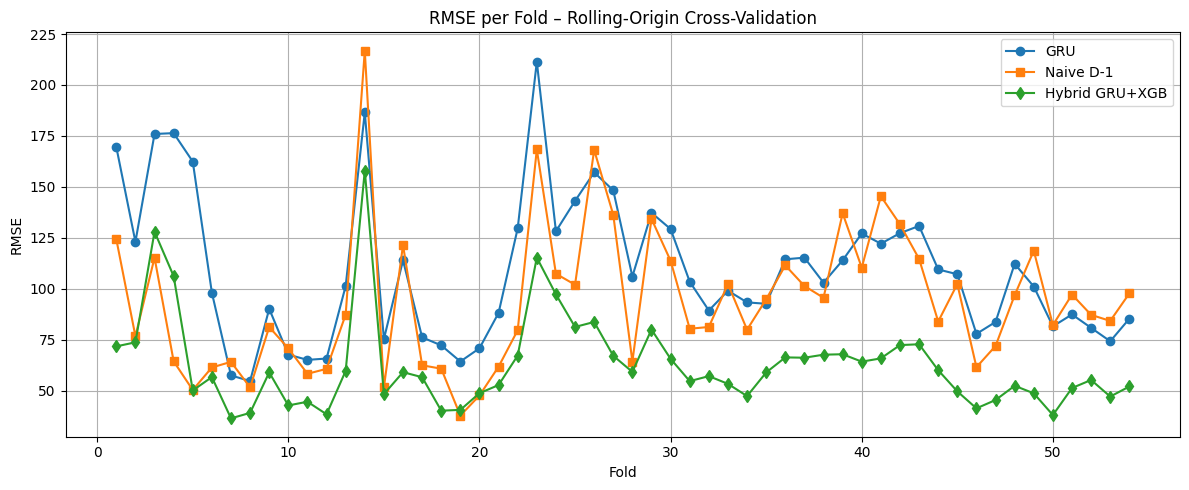

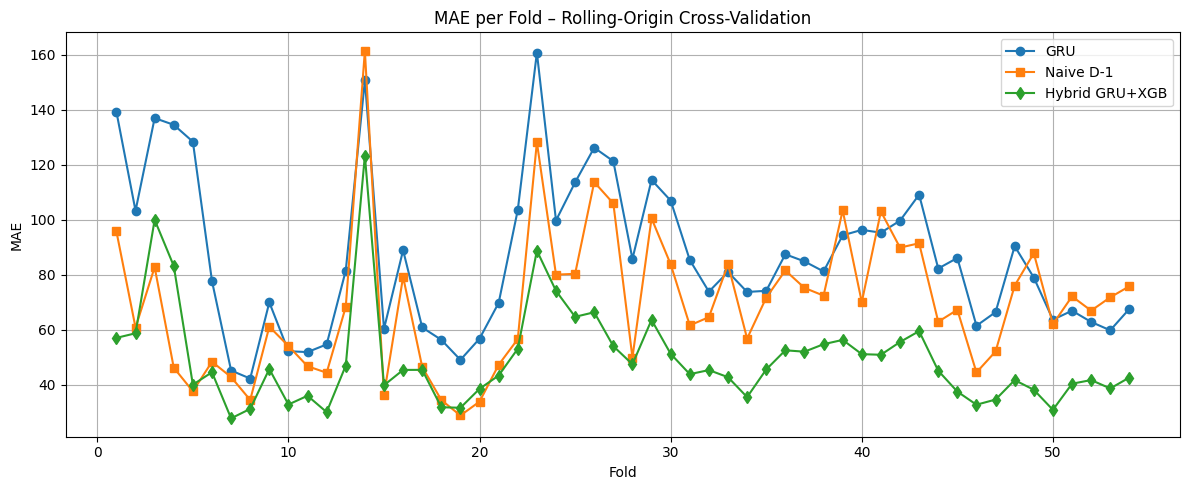

In [6]:
# ===================== Grafiku RMSE vs Fold =======================
# Numri i foldeve merret direkt nga gjatësia e listave të metrikeve
fold_numbers = list(range(1, len(gru_rmse_list) + 1))

plt.figure(figsize=(12, 5))
plt.plot(fold_numbers, gru_rmse_list,   marker='o', label='GRU')
plt.plot(fold_numbers, naive_rmse_list, marker='s', label='Naive D-1')
plt.plot(fold_numbers, hyb_rmse_list,   marker='d', label='Hybrid GRU+XGB')

plt.title('RMSE per Fold – Rolling-Origin Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("rmse_vs_fold.png", dpi=600, bbox_inches='tight')
plt.show()

# ===================== Grafiku MAE vs Fold =======================
fold_numbers = list(range(1, len(gru_mae_list) + 1))

plt.figure(figsize=(12, 5))
plt.plot(fold_numbers, gru_mae_list,   marker='o', label='GRU')
plt.plot(fold_numbers, naive_mae_list, marker='s', label='Naive D-1')
plt.plot(fold_numbers, hyb_mae_list,   marker='d', label='Hybrid GRU+XGB')

plt.title('MAE per Fold – Rolling-Origin Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("mae_vs_fold.png", dpi=600, bbox_inches='tight')
plt.show()



--- Metrics on TEST ---
[XGB (numeric-only, 72→24, holidays+lags+fourier)] MAE: 74.82 | RMSE: 99.84 | MAPE: 16.06% | R²: 0.7673 | Accuracy: 83.94%


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


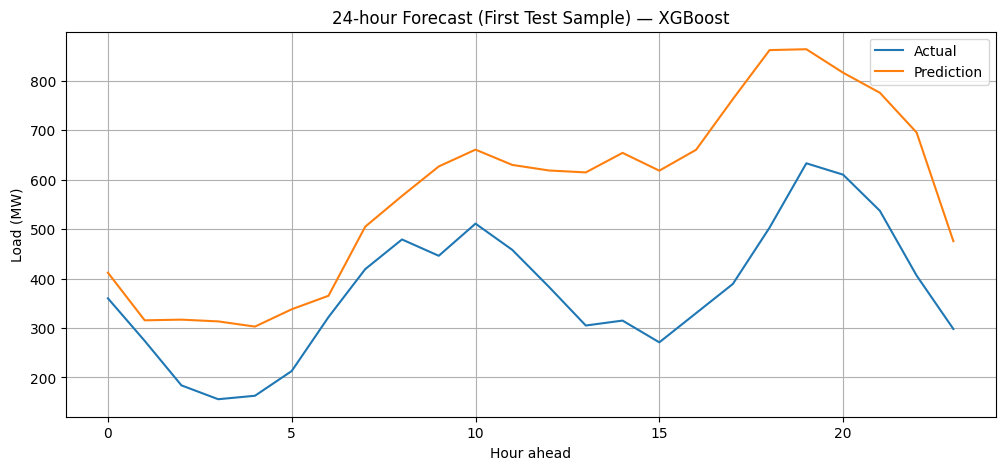

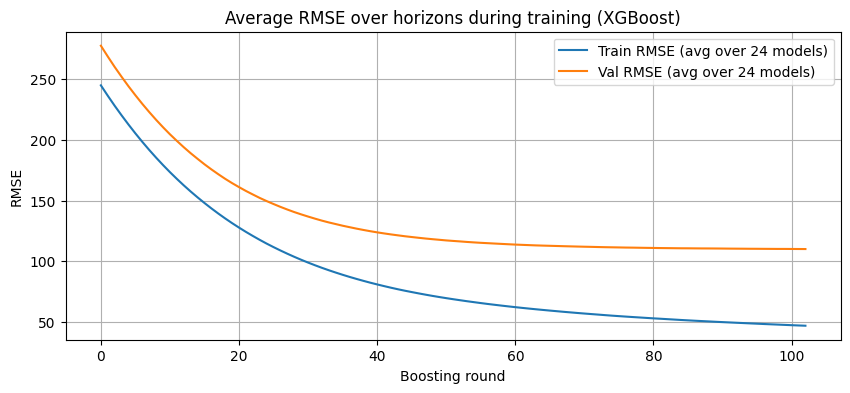

In [7]:
# ========================== Setup & Imports ==========================
import sys, subprocess, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure required packages
def _ensure(pkg):
    try:
        __import__(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
_ensure("xgboost")
try:
    import holidays
    HAVE_HOLS = True
except Exception:
    HAVE_HOLS = False

import xgboost as xgb
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, r2_score
)

np.random.seed(42)

# ========================== 1) Load & clean ==========================
df = pd.read_csv("ost_data_clean.csv", sep=';', engine='python')
df.columns = df.columns.str.strip()

# Fix 'Ora' -> only digits, 2 chars
df['Ora'] = (
    df['Ora'].astype(str)
             .str.extract(r'(\d+)', expand=False)
             .fillna('0')
             .astype(int).astype(str).str.zfill(2)
)

# Parse date
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Handle possible '24' hour by rolling to next day at 00
mask_24 = df['Ora'] == '24'
df.loc[mask_24, 'Ora']  = '00'
df.loc[mask_24, 'Data'] = df.loc[mask_24, 'Data'] + pd.Timedelta(days=1)

# Build Datetime index
df['Datetime'] = pd.to_datetime(
    df['Data'].dt.strftime('%Y-%m-%d') + ' ' + df['Ora'],
    format='%Y-%m-%d %H', errors='coerce'
)
df.set_index('Datetime', inplace=True)
df.dropna(how='any', inplace=True)

# Standardize target name
if 'Ngarkesa Totale' in df.columns and 'Load' not in df.columns:
    df = df.rename(columns={'Ngarkesa Totale': 'Load'})

# Build total cross-border exchange if missing
if 'Shkembimi fizik nderkufitar' not in df.columns:
    for c in ['Shkembimi fizik nderkufitar AL-ME',
              'Shkembimi fizik nderkufitar AL-KS',
              'Shkembimi fizik nderkufitar AL-GR']:
        if c not in df.columns:
            df[c] = 0.0
    df['Shkembimi fizik nderkufitar'] = (
        df.get('Shkembimi fizik nderkufitar AL-ME', 0.0) +
        df.get('Shkembimi fizik nderkufitar AL-KS', 0.0) +
        df.get('Shkembimi fizik nderkufitar AL-GR', 0.0)
    )

# Keep a minimal base set if available
base_cols = ['Load', 'Prodhimi Total', 'Shkembimi fizik nderkufitar',
             'Shkembimi fizik nderkufitar AL-ME',
             'Shkembimi fizik nderkufitar AL-KS',
             'Shkembimi fizik nderkufitar AL-GR']
present = [c for c in base_cols if c in df.columns]
df = df[present].copy()

# Basic positivity filter for target if needed
df = df[df['Load'] > 0].copy()

# ========================== 2) Time features & holidays ==========================
df['hour']      = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
df['month']     = df.index.month

# country holidays (AL, ME, XK, GR, union ANY) — optional if holidays available
if HAVE_HOLS:
    years = sorted(df.index.year.unique())
    dser  = pd.Series(df.index.date, index=df.index)

    def _flag(code, fallback=None):
        try:
            cal = holidays.CountryHoliday(code, years=years)
            return dser.isin(cal).astype(int)
        except Exception:
            if fallback is not None:
                try:
                    cal = fallback(years=years)
                    return dser.isin(cal).astype(int)
                except Exception:
                    return pd.Series(0, index=df.index, dtype=int)
            return pd.Series(0, index=df.index, dtype=int)

    df['Holiday_AL'] = _flag('AL')
    df['Holiday_ME'] = _flag('ME')
    # Kosovo can be tricky in some versions
    try:
        df['Holiday_XK'] = _flag('XK', fallback=getattr(holidays, 'Kosovo', None))
    except Exception:
        df['Holiday_XK'] = 0
    df['Holiday_GR'] = _flag('GR')
    df['Holiday_ANY'] = df[['Holiday_AL','Holiday_ME','Holiday_XK','Holiday_GR']].max(axis=1).astype(int)
else:
    # If 'holidays' not available, just put zeros
    for c in ['Holiday_AL','Holiday_ME','Holiday_XK','Holiday_GR','Holiday_ANY']:
        df[c] = 0

# ========================== 3) Lags, rolling, dynamics, Fourier ==========================
df['lag_1']   = df['Load'].shift(1)
df['lag_24']  = df['Load'].shift(24)
df['lag_48']  = df['Load'].shift(48)
df['lag_168'] = df['Load'].shift(168)

df['roll_mean_24'] = df['Load'].rolling(24).mean()
df['roll_std_24']  = df['Load'].rolling(24).std()
df['roll_max_24']  = df['Load'].rolling(24).max()
df['roll_min_24']  = df['Load'].rolling(24).min()

# Exchange dynamics
ex_cols = [c for c in ['Shkembimi fizik nderkufitar',
                       'Shkembimi fizik nderkufitar AL-ME',
                       'Shkembimi fizik nderkufitar AL-KS',
                       'Shkembimi fizik nderkufitar AL-GR'] if c in df.columns]
df['Total_Exchange'] = df[ex_cols].sum(axis=1) if ex_cols else 0.0
df['Delta_Exchange'] = df['Total_Exchange'].diff()

# Fourier seasonality (daily & weekly)
def add_fourier(frame, tag, period, K=3):
    t = np.arange(len(frame), dtype=float)
    for k in range(1, K+1):
        frame[f'{tag}_sin_{period}_{k}'] = np.sin(2*np.pi*k*t/period)
        frame[f'{tag}_cos_{period}_{k}'] = np.cos(2*np.pi*k*t/period)
    return frame

df = add_fourier(df, 'fourier_daily', 24,  K=3)
df = add_fourier(df, 'fourier_weekly', 168, K=3)

# Drop NaNs created by lags/rolling
df.dropna(inplace=True)

# ========================== 4) Keep ONLY numeric columns ==========================
if 'Load' not in df.columns:
    raise ValueError("'Load' column not found after preprocessing.")

# Drop any non-numeric column (e.g., datetimes/strings)
non_numeric = df.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    df = df.drop(columns=non_numeric)

# Enforce Load numeric & valid
df['Load'] = pd.to_numeric(df['Load'], errors='coerce')
df = df.dropna(subset=['Load'])

# ========================== 5) Windowing 72 → 24 ==========================
def make_windows(frame, input_window=72, output_horizon=24, target='Load'):
    X, y, times = [], [], []
    cols = frame.columns.tolist()
    t_idx = cols.index(target)
    idx = frame.index

    for i in range(input_window, len(frame) - output_horizon):
        past   = frame.iloc[i-input_window:i].values        # (72, F)
        future = frame.iloc[i:i+output_horizon, t_idx].values  # (24,)
        X.append(past)
        y.append(future)
        times.append(idx[i:i+output_horizon].values)  # timestamps per horizon
    return np.array(X), np.array(y), np.array(times)

X_all, y_all, times_all = make_windows(df, 72, 24, target='Load')

# Cast to float32 for XGBoost compatibility
X_all = X_all.astype(np.float32)
y_all = y_all.astype(np.float32)

# Flatten the 3D past window into 2D features (N, 72*F)
N, Win, F = X_all.shape
X_all = X_all.reshape(N, Win*F)

# ========================== 6) Time split: 70/10/20 ==========================
n_total = X_all.shape[0]
i_train_end = int(n_total * 0.70)
i_val_end   = int(n_total * 0.80)

X_train, X_val, X_test = X_all[:i_train_end], X_all[i_train_end:i_val_end], X_all[i_val_end:]
y_train, y_val, y_test = y_all[:i_train_end], y_all[i_train_end:i_val_end], y_all[i_val_end:]
times_train, times_val, times_test = times_all[:i_train_end], times_all[i_train_end:i_val_end], times_all[i_val_end:]

# ========================== 7) XGBoost (one model per horizon) ==========================
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.04,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,
    'min_child_weight': 1,
    'tree_method': 'hist',
    'seed': 42,
}
num_boost_round = 200
early_stopping_rounds = 20

models = []
eval_histories = []  # for optional plotting later

for h in range(y_train.shape[1]):  # 24 horizons
    dtrain = xgb.DMatrix(X_train, label=y_train[:, h])
    dval   = xgb.DMatrix(X_val,   label=y_val[:, h])

    evals_result = {}
    booster = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtrain, 'train'), (dval, 'val')],
        early_stopping_rounds=early_stopping_rounds,
        evals_result=evals_result,
        verbose_eval=False
    )
    models.append(booster)
    eval_histories.append(evals_result)

# ========================== 8) Predict on TEST ==========================
dtest = xgb.DMatrix(X_test)
y_pred = np.column_stack([m.predict(dtest, iteration_range=(0, m.best_iteration+1))
                          for m in models])

# ========================== 9) Metrics ==========================
def eval_metrics(y_true_2d, y_pred_2d, tag="XGB 72→24"):
    yt = y_true_2d.reshape(-1)
    yp = y_pred_2d.reshape(-1)
    mae  = mean_absolute_error(yt, yp)
    rmse = mean_squared_error(yt, yp, squared=False)
    eps  = 1e-6
    yt_safe = np.where(yt == 0, eps, yt)
    mape = mean_absolute_percentage_error(yt_safe, yp) * 100
    r2   = r2_score(yt, yp)
    acc  = 100 - mape
    print(f"[{tag}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}% | R²: {r2:.4f} | Accuracy: {acc:.2f}%")
    return mae, rmse, mape, r2, acc

print("\n--- Metrics on TEST ---")
eval_metrics(y_test, y_pred, tag="XGB (numeric-only, 72→24, holidays+lags+fourier)")

# ========================== 10) Plot first test sample ==========================
plt.figure(figsize=(12,5))
plt.plot(y_test[0], label='Actual')
plt.plot(y_pred[0], label='Prediction')
plt.title('24-hour Forecast (First Test Sample) — XGBoost')
plt.xlabel('Hour ahead'); plt.ylabel('Load (MW)')
plt.grid(True); plt.legend()
plt.savefig("xgb_forecast_first_sample.png", dpi=600, bbox_inches='tight')
plt.show()

# Average validation loss across horizons

try:
    min_len = min(len(hist['val']['rmse']) for hist in eval_histories)
    avg_val = np.mean([hist['val']['rmse'][:min_len] for hist in eval_histories], axis=0)
    avg_tr  = np.mean([hist['train']['rmse'][:min_len] for hist in eval_histories], axis=0)
    plt.figure(figsize=(10,4))
    plt.plot(avg_tr, label='Train RMSE (avg over 24 models)')
    plt.plot(avg_val, label='Val RMSE (avg over 24 models)')
    plt.title('Average RMSE over horizons during training (XGBoost)')
    plt.xlabel('Boosting round'); plt.ylabel('RMSE'); plt.grid(True); plt.legend()
    plt.savefig("xgb_avg_rmse_train_val.png", dpi=600, bbox_inches='tight')
    plt.show()

except Exception:
    pass


In [8]:
# ========================== 11) Rolling-origin Cross-Validation for XGB ==========================

def generate_rolling_folds_N(N, min_train_days=90, test_days=7):
    """
    Gjeneron folds me dritare kohore në nivel mostre (N = numri i dritareve 72→24).
    Çdo mostër korrespondon me një orë, pasi dritaret rrëshqasin me hap 1.
    """
    hours_per_day = 24
    min_train_len = min_train_days * hours_per_day
    test_len      = test_days * hours_per_day

    folds = []
    train_start = 0
    train_end   = min_train_len

    while True:
        test_start = train_end
        test_end   = train_end + test_len

        if test_end > N:
            break

        folds.append((train_start, train_end, test_start, test_end))
        # expanding window: trajnimi zgjerohet deri në fund të testit
        train_end = test_end

    return folds

# Gjenerojmë folds në bazë të numrit total të mostrave (X_all)
N_all = X_all.shape[0]
cv_folds_xgb = generate_rolling_folds_N(N_all, min_train_days=90, test_days=7)
print("Numri i folds (XGB):", len(cv_folds_xgb))

xgb_mae_list, xgb_rmse_list, xgb_mape_list, xgb_r2_list = [], [], [], []

for fold_idx, (tr_s, tr_e, te_s, te_e) in enumerate(cv_folds_xgb):
    print(f"\n=== XGB FOLD {fold_idx+1}/{len(cv_folds_xgb)} ===")
    print(f"Train: {tr_s}:{tr_e}, Test: {te_s}:{te_e}")

    # 1) Ndajmë train/test për këtë fold (72→24 dritare tashmë të ndërtuara)
    X_tr_fold = X_all[tr_s:tr_e]
    y_tr_fold = y_all[tr_s:tr_e]
    X_te_fold = X_all[te_s:te_e]
    y_te_fold = y_all[te_s:te_e]

    # 2) Brenda train-it të këtij fold-i ndajmë edhe një VAL të vogël (p.sh. 10%)
    Ntr_fold = X_tr_fold.shape[0]
    if Ntr_fold < 100:
        # nëse kemi shumë pak mostra, përdorim të gjithë train-in pa VAL të brendshëm
        X_tr_sub, y_tr_sub = X_tr_fold, y_tr_fold
        X_val_sub, y_val_sub = None, None
    else:
        split_idx = int(Ntr_fold * 0.9)
        X_tr_sub,  y_tr_sub  = X_tr_fold[:split_idx],  y_tr_fold[:split_idx]
        X_val_sub, y_val_sub = X_tr_fold[split_idx:], y_tr_fold[split_idx:]

    # 3) Trajnojmë 24 modele XGB (një për çdo horizont)
    models_fold = []
    for h in range(y_tr_fold.shape[1]):  # 24 horizons
        dtrain = xgb.DMatrix(X_tr_sub, label=y_tr_sub[:, h])

        if X_val_sub is not None:
            dval   = xgb.DMatrix(X_val_sub, label=y_val_sub[:, h])
            booster = xgb.train(
                params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=[(dtrain, 'train'), (dval, 'val')],
                early_stopping_rounds=early_stopping_rounds,
                verbose_eval=False
            )
        else:
            # pa val të brendshëm – trenim i thjeshtë pa early stopping
            booster = xgb.train(
                params,
                dtrain,
                num_boost_round=num_boost_round,
                evals=[(dtrain, 'train')],
                verbose_eval=False
            )

        models_fold.append(booster)

    # 4) Parashikime në TEST për këtë fold
    dtest_fold = xgb.DMatrix(X_te_fold)
    y_pred_fold = np.column_stack([
        m.predict(dtest_fold, iteration_range=(0, m.best_iteration+1)
                  if hasattr(m, "best_iteration") and m.best_iteration is not None
                  else (0, num_boost_round))
        for m in models_fold
    ])

    # 5) Metrikat për këtë fold
    mae_f, rmse_f, mape_f, r2_f, _ = eval_metrics(y_te_fold, y_pred_fold,
                                                  tag=f"XGB 72→24 (fold {fold_idx+1})")
    xgb_mae_list.append(mae_f)
    xgb_rmse_list.append(rmse_f)
    xgb_mape_list.append(mape_f)
    xgb_r2_list.append(r2_f)

# ========================== 12) Përmbledhje e CV për XGB ==========================

def summarize_cv(name, mae_list, rmse_list, mape_list, r2_list):
    print(f"\n=== {name} – Rolling-origin CV Summary ===")
    print(f"MAE  : {np.mean(mae_list):.2f} ± {np.std(mae_list):.2f}")
    print(f"RMSE : {np.mean(rmse_list):.2f} ± {np.std(rmse_list):.2f}")
    print(f"MAPE : {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
    print(f"R²   : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

summarize_cv("XGB 72→24", xgb_mae_list, xgb_rmse_list, xgb_mape_list, xgb_r2_list)

# ========================== 13) Grafiku RMSE vs Fold & MAE vs Fold (XGB) ==========================

fold_numbers = list(range(1, len(xgb_rmse_list) + 1))

plt.figure(figsize=(12, 5))
plt.plot(fold_numbers, xgb_rmse_list, marker='o', label='XGB 72→24')
plt.title('RMSE per Fold – Rolling-Origin Cross-Validation (XGB)')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("xgb_rmse_vs_fold.png", dpi=600, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(fold_numbers, xgb_mae_list, marker='s', label='XGB 72→24')
plt.title('MAE per Fold – Rolling-Origin Cross-Validation (XGB)')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("xgb_mae_vs_fold.png", dpi=600, bbox_inches='tight')
plt.show()


Numri i folds (XGB): 53

=== XGB FOLD 1/53 ===
Train: 0:2160, Test: 2160:2328


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[XGB 72→24 (fold 1)] MAE: 158.88 | RMSE: 187.63 | MAPE: 16.58% | R²: 0.0823 | Accuracy: 83.42%

=== XGB FOLD 2/53 ===
Train: 0:2328, Test: 2328:2496


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[XGB 72→24 (fold 2)] MAE: 111.47 | RMSE: 153.13 | MAPE: 12.98% | R²: 0.2979 | Accuracy: 87.02%

=== XGB FOLD 3/53 ===
Train: 0:2496, Test: 2496:2664


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[XGB 72→24 (fold 3)] MAE: 82.71 | RMSE: 106.17 | MAPE: 9.52% | R²: 0.6773 | Accuracy: 90.48%

=== XGB FOLD 4/53 ===
Train: 0:2664, Test: 2664:2832


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[XGB 72→24 (fold 4)] MAE: 122.58 | RMSE: 154.87 | MAPE: 10.87% | R²: 0.4502 | Accuracy: 89.13%

=== XGB FOLD 5/53 ===
Train: 0:2832, Test: 2832:3000


C:\Users\Alketa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[XGB 72→24 (fold 5)] MAE: 112.51 | RMSE: 137.71 | MAPE: 10.25% | R²: 0.5120 | Accuracy: 89.75%

=== XGB FOLD 6/53 ===
Train: 0:3000, Test: 3000:3168


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigurohemi që të gjithë listat kanë të paktën kaq folds
n_folds = min(
    len(gru_rmse_list),
    len(naive_rmse_list),
    len(hyb_rmse_list),
    len(xgb_rmse_list)
)

folds = np.arange(1, n_folds + 1)

# ===================== RMSE per Fold – TË GJITHË MODELET =====================
plt.figure(figsize=(12, 5))
plt.plot(folds, naive_rmse_list[:n_folds], marker='o', label='Naive D-1')
plt.plot(folds, gru_rmse_list[:n_folds],   marker='s', label='GRU')
plt.plot(folds, xgb_rmse_list[:n_folds],   marker='^', label='XGB 72→24')
plt.plot(folds, hyb_rmse_list[:n_folds],   marker='d', label='Hybrid GRU+XGB')

plt.title('RMSE per Fold – Rolling-Origin Cross-Validation (Naive vs GRU vs XGB vs Hybrid)')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("rmse_vs_fold_all_models.png", dpi=600, bbox_inches='tight')
plt.show()

# ===================== MAE per Fold – TË GJITHË MODELET =====================
plt.figure(figsize=(12, 5))
plt.plot(folds, naive_mae_list[:n_folds], marker='o', label='Naive D-1')
plt.plot(folds, gru_mae_list[:n_folds],   marker='s', label='GRU')
plt.plot(folds, xgb_mae_list[:n_folds],   marker='^', label='XGB 72→24')
plt.plot(folds, hyb_mae_list[:n_folds],   marker='d', label='Hybrid GRU+XGB')

plt.title('MAE per Fold – Rolling-Origin Cross-Validation (Naive vs GRU vs XGB vs Hybrid)')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("mae_vs_fold_all_models.png", dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
y_te_xgb_true = y_test      # nëse test-i është i njëjtë me y_te_true
y_te_xgb_pred = y_pred
dm_hyb_xgb, p_hyb_xgb, dbar_hx = diebold_mariano(
    y_te_true,        # vlerat reale (test)
    y_te_hybrid,      # Hybrid
    y_te_xgb_pred,    # XGB standalone
    h=horizon,
    power=2,
    name1="Hybrid",
    name2="XGB"
)
